<a href="https://colab.research.google.com/github/rakshyanki4151-web/Modeling-Blood-Glucose-Dynamics-Using-Nonlinear-Regression/blob/main/Modeling_Blood_Glucose_Dynamics_Using_Nonlinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data <- read.csv("/content/drive/My Drive/Colab Notebooks/dataset.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘imputeTS’


The following object is masked from ‘package:zoo’:

    na.locf


corrplot 0.95 loaded


Attaching package: ‘tseries’


The foll

Loading dataset.csv...

--------------------------------------------------
DATASET OVERVIEW
--------------------------------------------------
Rows:    21919
Columns: 7
Variables: bg_mean, insulin_sum, carbs_sum, hr_mean, steps_sum, cals_sum, bg.1.00

--------------------------------------------------
IMPUTATION: HR_MEAN ONLY
--------------------------------------------------
Missing values before: 7872
Missing values after:  0
Imputed values: 7872


HR_MEAN after imputation:
------------------------------ 
Missing values: 0 
Summary of hr_mean:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  52.00   74.46   83.85   85.35   94.47  143.00 
First 10 values of hr_mean:
 [1] 95.1 95.1 95.1 95.1 95.1 95.1 95.1 95.1 95.1 95.1

First few rows of the updated data frame:
   bg_mean insulin_sum carbs_sum hr_mean steps_sum cals_sum bg.1.00 time_index
1 13.34167      1.8644         0    95.1         0        0    13.4          1
2 13.54167      1.9646         0    95.1         0        0    12.

Warning message:
“Removed 499 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 499 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 499 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 499 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 499 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 499 rows containing missing values or values outside the scale range
(`geom_line()`).”


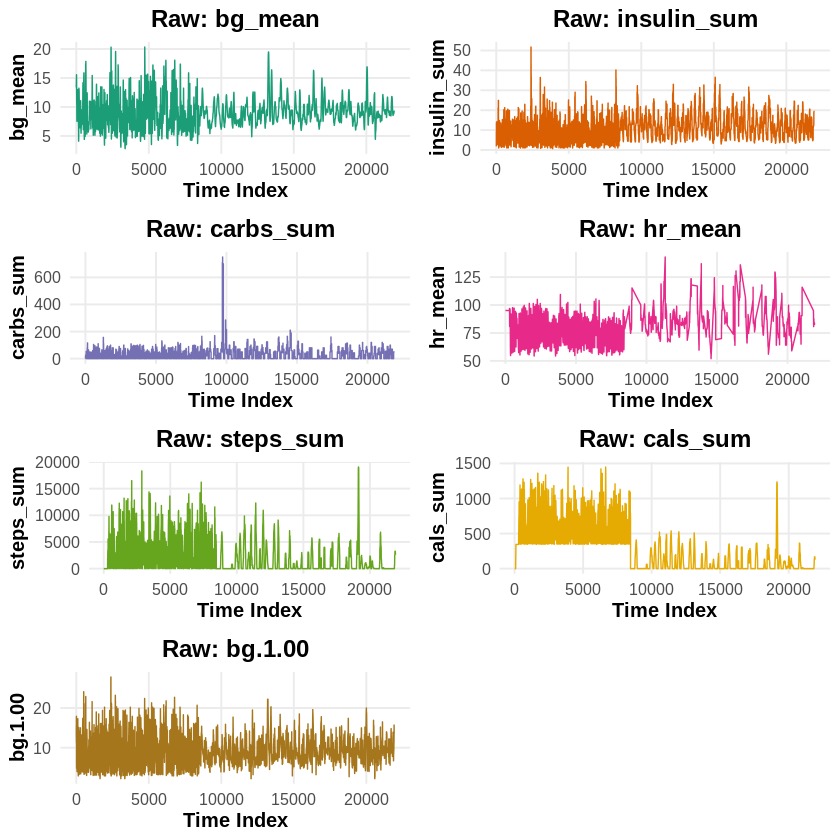

Plot 3: Segmented trends


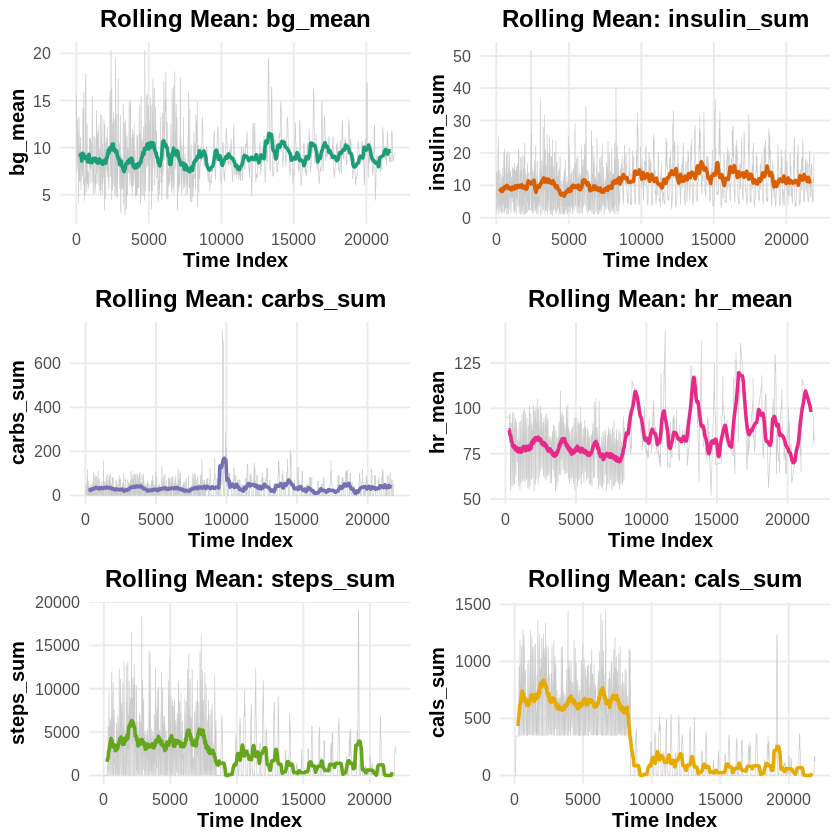


--------------------------------------------------
DISTRIBUTION ANALYSIS
--------------------------------------------------
Plot 4: Predictor distributions


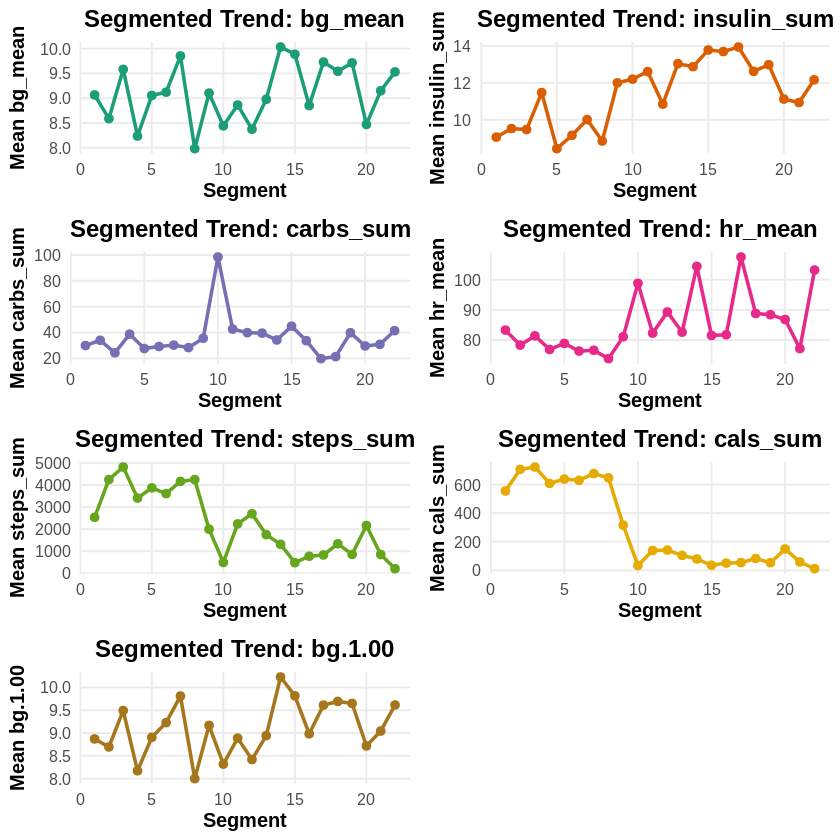

Plot 5: Target variable distribution


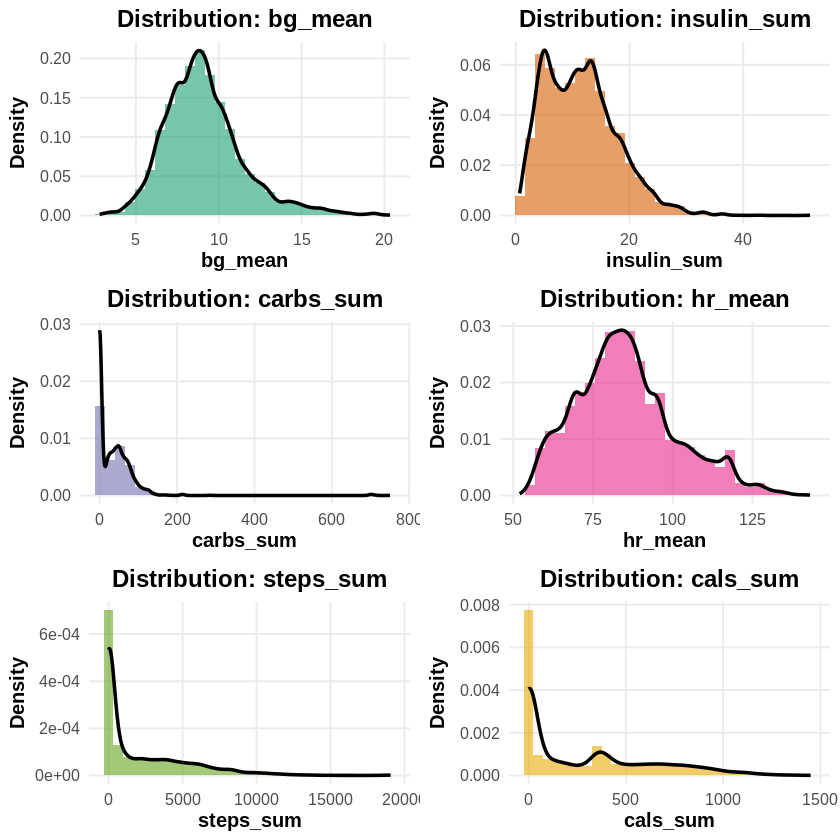

Plot 6: Q-Q plots


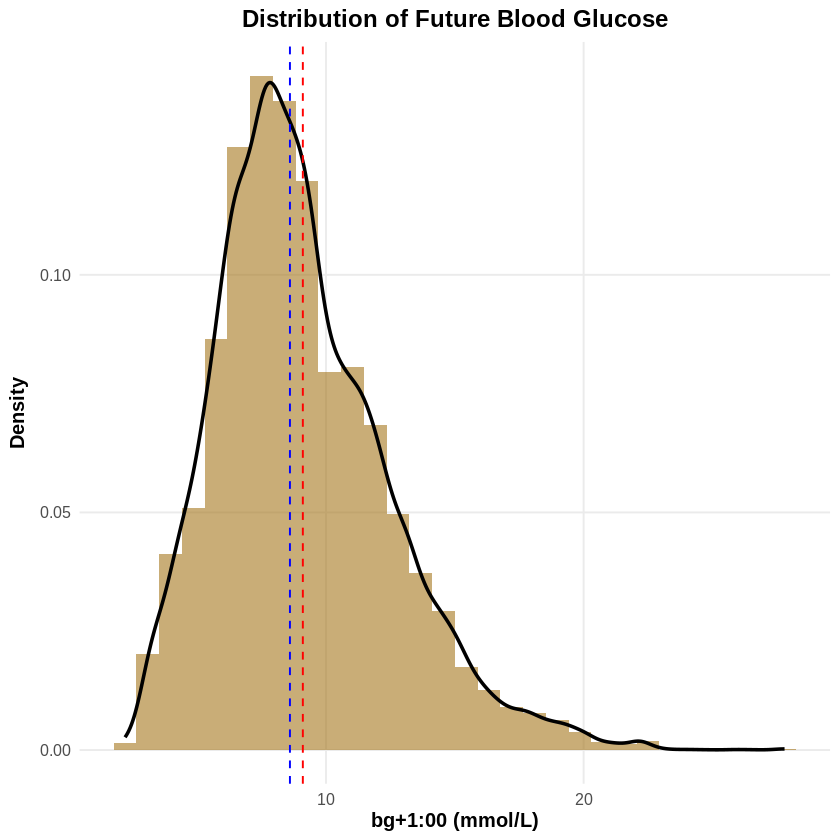

Plot 7-8: Box and violin plots


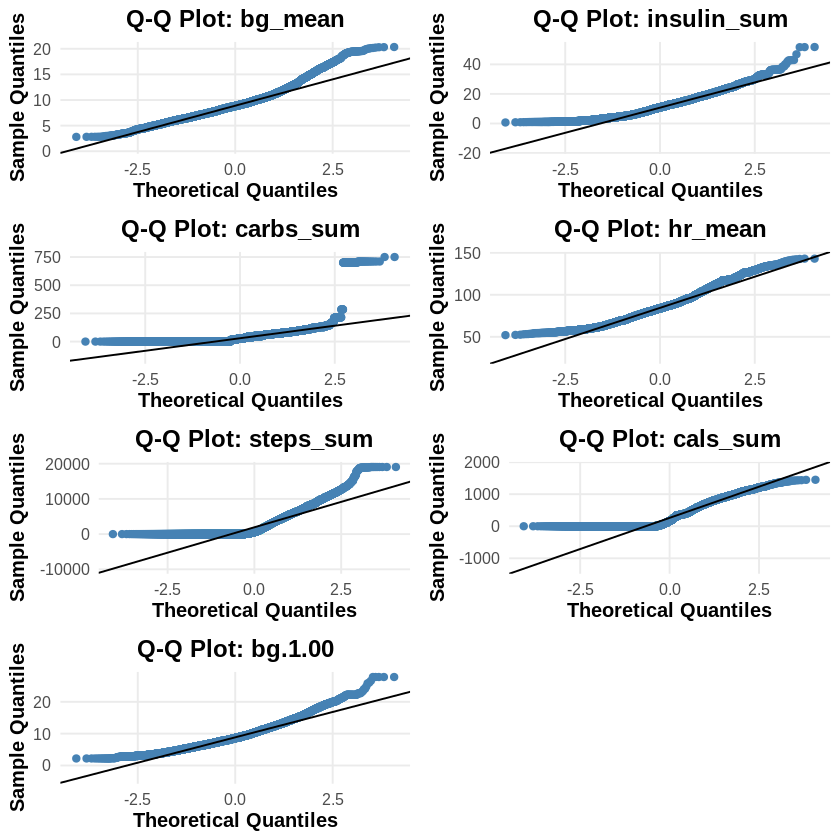


--------------------------------------------------
STATISTICAL ANALYSIS
--------------------------------------------------

Distribution Statistics:
----------------------------------------------------------------------
Variable            Mean       SD   Skewness   Kurtosis
----------------------------------------------------------------------
bg_mean             9.10     2.39      0.925      4.715
insulin_sum        11.40     6.28      0.700      3.583
carbs_sum          36.04    52.98      6.916     84.230
hr_mean            85.35    15.75      0.548      3.071
steps_sum        2229.95  3015.69      1.568      5.520
cals_sum          295.95   333.28      0.890      2.703
bg.1.00             9.10     3.36      0.840      4.042

Statistical Tests:
----------------------------------------
Normality (Lilliefors): p = 0.000000


Warning message in adf.test(data[[target]], alternative = "stationary"):
“p-value smaller than printed p-value”


Stationarity (ADF):     p = 0.0100

--------------------------------------------------
CORRELATION ANALYSIS
--------------------------------------------------
Plot 9: Correlation matrix


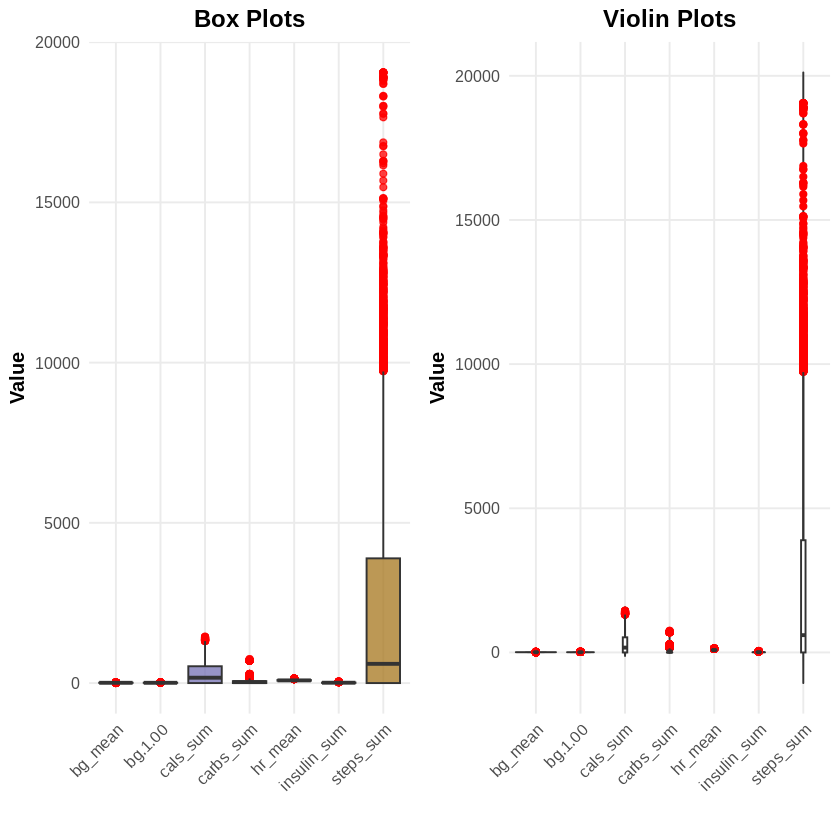


Correlation with target variable:
----------------------------------------
bg_mean        : r = 0.249
steps_sum      : r = -0.088
cals_sum       : r = -0.077
insulin_sum    : r = 0.072
carbs_sum      : r = 0.060
hr_mean        : r = -0.018

Plot 10: Scatter plots


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


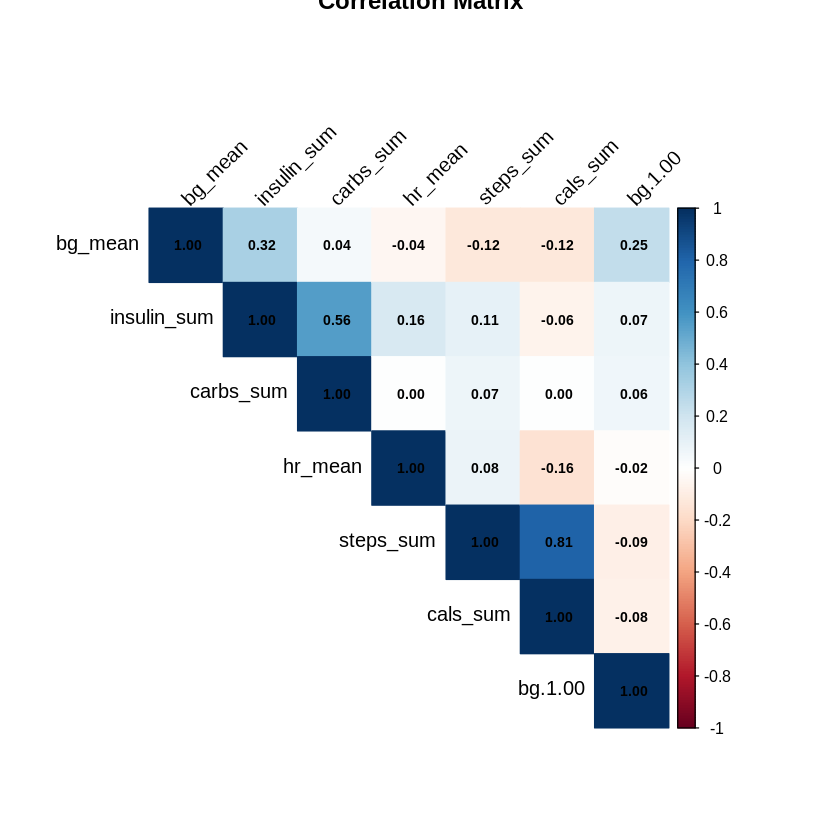

Plot 11: Scatter matrix


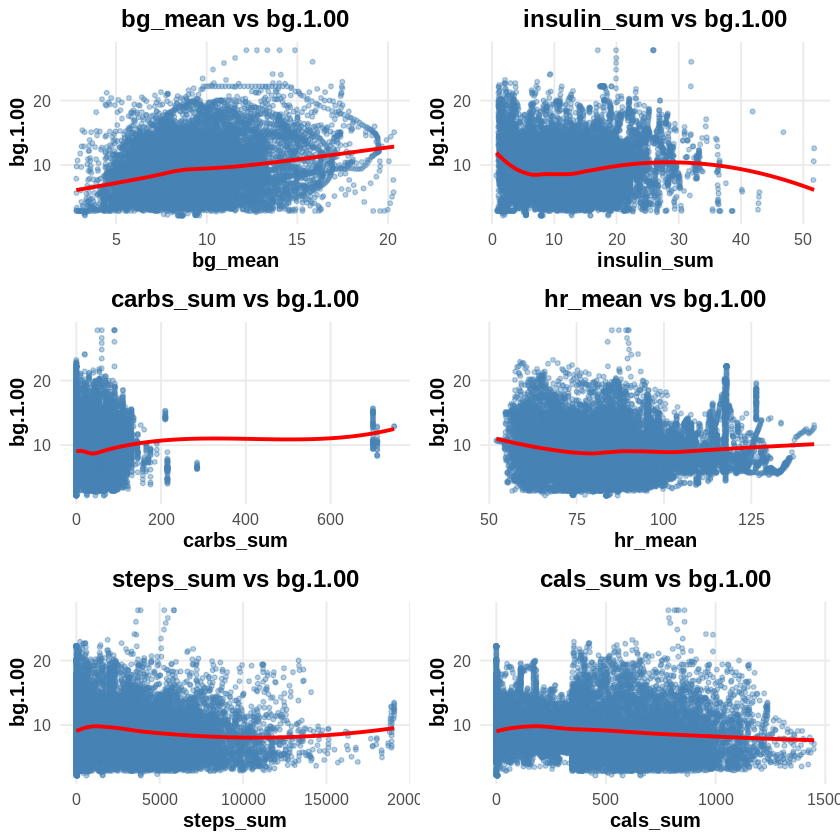


--------------------------------------------------
CLINICAL CONTEXT
--------------------------------------------------

Clinical Distribution (% of readings):
--------------------------------------------------
State                          Current       Future
Hypoglycemic (<4)                 0.5%         3.3%
Normal (4-10)                    70.4%        63.7%
Hyperglycemic (>10)              29.1%        33.0%

--------------------------------------------------
KEY FINDINGS
--------------------------------------------------

1. Dataset Characteristics:
   • 21919 observations, 7 variables
   • HR mean imputed: 7872 values

2. Statistical Properties:
   • Normality test: p = 0.000000
   • Stationarity test: p = 0.0100

3. Key Relationships:
   • Strongest predictor: bg_mean (r = 0.249)

4. Clinical Distribution:
   • Current glucose in normal range: 70.4%
   • Future glucose in normal range: 63.7%

ANALYSIS COMPLETE

Processed data saved: dataset_processed.csv
Contains 21919 observ

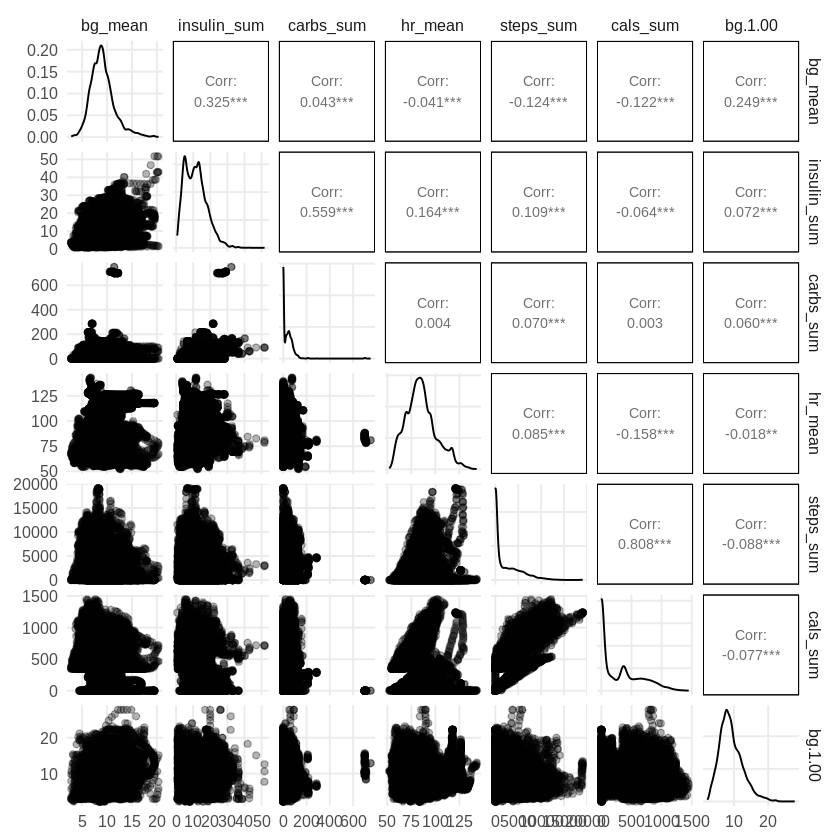

In [1]:
# =============================================================================
# TASK 1: PRELIMINARY DATA ANALYSIS
# MSc Data Science - Type 1 Diabetes Dataset
# =============================================================================

# -----------------------------------------------------------------------------
# 1. LOAD REQUIRED PACKAGES
# -----------------------------------------------------------------------------
required_packages <- c(
  "tidyverse", "ggplot2", "gridExtra", "zoo",
  "imputeTS", "corrplot", "nortest", "moments",
  "RColorBrewer", "GGally", "tseries"
)

new_packages <- required_packages[!(required_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

library(tidyverse)
library(ggplot2)
library(gridExtra)
library(zoo)
library(imputeTS)
library(corrplot)
library(nortest)
library(moments)
library(RColorBrewer)
library(GGally)
library(tseries)

# -----------------------------------------------------------------------------
# 2. LOAD AND PREPARE DATA
# -----------------------------------------------------------------------------
cat("Loading dataset.csv...\n")
data <- read.csv("/content/drive/My Drive/Colab Notebooks/dataset.csv")
colnames(data) <- make.names(colnames(data))
data$time_index <- seq_len(nrow(data))

# -----------------------------------------------------------------------------
# 3. DEFINE VARIABLES
# -----------------------------------------------------------------------------
predictors <- c("bg_mean", "insulin_sum", "carbs_sum",
                "hr_mean", "steps_sum", "cals_sum")
target <- "bg.1.00"
variables <- c(predictors, target)

stopifnot(all(variables %in% colnames(data)))

# -----------------------------------------------------------------------------
# 4. DATASET OVERVIEW
# -----------------------------------------------------------------------------
cat(paste0("\n", strrep("-", 50), "\n"))
cat("DATASET OVERVIEW\n")
cat(paste0(strrep("-", 50), "\n"))
cat(sprintf("Rows:    %d\n", nrow(data)))
cat(sprintf("Columns: %d\n", length(variables)))
cat(sprintf("Variables: %s\n", paste(variables, collapse = ", ")))

# -----------------------------------------------------------------------------
# 5. VISUALIZATION SETTINGS
# -----------------------------------------------------------------------------
pal <- brewer.pal(8, "Dark2")

theme_set(
  theme_minimal(base_size = 12) +
    theme(
      plot.title = element_text(face = "bold", hjust = 0.5),
      axis.title = element_text(face = "bold"),
      panel.grid.minor = element_blank()
    )
)

# -----------------------------------------------------------------------------
# 6. IMPUTATION: HR_MEAN ONLY
# -----------------------------------------------------------------------------
cat(paste0("\n", strrep("-", 50), "\n"))
cat("IMPUTATION: HR_MEAN ONLY\n")
cat(paste0(strrep("-", 50), "\n"))

missing_before <- sum(is.na(data$hr_mean))
cat(sprintf("Missing values before: %d\n", missing_before))

data$hr_mean <- ifelse(!is.na(data$hr_mean) & data$hr_mean == 0, NA, data$hr_mean)
data$hr_mean <- na_interpolation(data$hr_mean, option = "linear")
data$hr_mean <- zoo::na.locf(zoo::na.locf(data$hr_mean, na.rm = FALSE), fromLast = TRUE)

missing_after <- sum(is.na(data$hr_mean))
cat(sprintf("Missing values after:  %d\n", missing_after))
cat(sprintf("Imputed values: %d\n\n", missing_before - missing_after))

cat("\nHR_MEAN after imputation:\n")
cat(strrep("-", 30), "\n")
cat("Missing values:", sum(is.na(data$hr_mean)), "\n")
cat("Summary of hr_mean:\n")
print(summary(data$hr_mean))
cat("First 10 values of hr_mean:\n")
print(head(data$hr_mean, 10))

cat("\nFirst few rows of the updated data frame:\n")
print(head(data))
cat("Summary of the updated data frame:\n")
print(summary(data))

# -----------------------------------------------------------------------------
# 6.5. COMPLETE DATA CHECK
# -----------------------------------------------------------------------------
cat(paste0("\n", strrep("-", 50), "\n"))
cat("FINAL DATA QUALITY CHECK\n")
cat(paste0(strrep("-", 50), "\n"))

# Check for any remaining NAs in key variables
na_check <- sapply(data[variables], function(x) sum(is.na(x)))
cat("\nRemaining NA values per variable:\n")
for(i in 1:length(na_check)) {
  if(na_check[i] > 0) {
    cat(sprintf("  %-15s: %d NAs (%.2f%%)\n",
                names(na_check)[i],
                na_check[i],
                na_check[i]/nrow(data)*100))
  } else {
    cat(sprintf("  %-15s: No NAs ✓\n", names(na_check)[i]))
  }
}

# Check data ranges for clinical validity
cat("\nClinical Range Check:\n")
cat(sprintf("  bg_mean range: %.1f to %.1f mmol/L\n",
            min(data$bg_mean, na.rm = TRUE),
            max(data$bg_mean, na.rm = TRUE)))
cat(sprintf("  bg.1.00 range: %.1f to %.1f mmol/L\n",
            min(data$bg.1.00, na.rm = TRUE),
            max(data$bg.1.00, na.rm = TRUE)))
cat(sprintf("  hr_mean range: %.1f to %.1f bpm\n",
            min(data$hr_mean, na.rm = TRUE),
            max(data$hr_mean, na.rm = TRUE)))

# -----------------------------------------------------------------------------
# 7. TIME SERIES VISUALIZATIONS
# -----------------------------------------------------------------------------
cat(paste0("\n", strrep("-", 50), "\n"))
cat("TIME SERIES ANALYSIS\n")
cat(paste0(strrep("-", 50), "\n"))

# 7.1 Raw Time Series
cat("Plot 1: Raw time series\n")
raw_plots <- lapply(seq_along(variables), function(i) {
  ggplot(data, aes(x = time_index, y = .data[[variables[i]]])) +
    geom_line(color = pal[i], linewidth = 0.4) +
    labs(title = paste("Raw:", variables[i]),
         x = "Time Index", y = variables[i])
})
grid.arrange(grobs = raw_plots, ncol = 2)

# 7.2 Rolling Mean Trends
cat("Plot 2: Rolling mean trends\n")
roll_window <- 500
data_roll <- data
for (pred in predictors) {
  roll_col <- paste0(pred, "_roll")
  data_roll[[roll_col]] <- rollmean(data[[pred]], roll_window,
                                     fill = NA, align = "center")
}

roll_plots <- lapply(seq_along(predictors), function(i) {
  p <- predictors[i]
  ggplot(data_roll, aes(x = time_index)) +
    geom_line(aes(y = .data[[p]]), color = "grey80", linewidth = 0.2) +
    geom_line(aes(y = .data[[paste0(p, "_roll")]]),
              color = pal[i], linewidth = 1) +
    labs(title = paste("Rolling Mean:", p),
         x = "Time Index", y = p)
})
grid.arrange(grobs = roll_plots, ncol = 2)

# 7.3 Segmented Trends
cat("Plot 3: Segmented trends\n")
segment_size <- 1000
data$segment <- floor((data$time_index - 1) / segment_size) + 1

segment_mean <- data %>%
  group_by(segment) %>%
  summarise(across(all_of(variables), ~ mean(.x, na.rm = TRUE)), .groups = "drop")

seg_ts <- lapply(seq_along(variables), function(i) {
  ggplot(segment_mean, aes(x = segment, y = .data[[variables[i]]])) +
    geom_line(color = pal[i], linewidth = 1) +
    geom_point(color = pal[i], size = 2) +
    labs(title = paste("Segmented Trend:", variables[i]),
         x = "Segment", y = paste("Mean", variables[i]))
})
grid.arrange(grobs = seg_ts, ncol = 2)

# -----------------------------------------------------------------------------
# 8. DISTRIBUTION ANALYSIS
# -----------------------------------------------------------------------------
cat(paste0("\n", strrep("-", 50), "\n"))
cat("DISTRIBUTION ANALYSIS\n")
cat(paste0(strrep("-", 50), "\n"))

# 8.1 Predictor Distributions
cat("Plot 4: Predictor distributions\n")
dist_pred_plots <- lapply(seq_along(predictors), function(i) {
  ggplot(data, aes(x = .data[[predictors[i]]])) +
    geom_histogram(aes(y = after_stat(density)),
                   bins = 30, fill = pal[i], alpha = 0.6) +
    geom_density(color = "black", linewidth = 1) +
    labs(title = paste("Distribution:", predictors[i]),
         x = predictors[i], y = "Density")
})
grid.arrange(grobs = dist_pred_plots, ncol = 2)

# 8.2 Target Distribution
cat("Plot 5: Target variable distribution\n")
ggplot(data, aes(x = .data[[target]])) +
  geom_histogram(aes(y = after_stat(density)),
                 bins = 30, fill = pal[7], alpha = 0.6) +
  geom_density(color = "black", linewidth = 1) +
  geom_vline(xintercept = mean(data[[target]], na.rm = TRUE),
             linetype = "dashed", color = "red") +
  geom_vline(xintercept = median(data[[target]], na.rm = TRUE),
             linetype = "dashed", color = "blue") +
  labs(title = "Distribution of Future Blood Glucose",
       x = "bg+1:00 (mmol/L)", y = "Density")

# 8.3 Q-Q Plots
cat("Plot 6: Q-Q plots\n")
qq_plots <- lapply(variables, function(v) {
  ggplot(data, aes(sample = .data[[v]])) +
    stat_qq(color = "steelblue") +
    stat_qq_line(color = "black") +
    labs(title = paste("Q-Q Plot:", v),
         x = "Theoretical Quantiles", y = "Sample Quantiles")
})
grid.arrange(grobs = qq_plots, ncol = 2)

# 8.4 Box and Violin Plots
cat("Plot 7-8: Box and violin plots\n")
data_long <- data %>%
  select(all_of(variables)) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Value")

box_plot <- ggplot(data_long, aes(x = Variable, y = Value, fill = Variable)) +
  geom_boxplot(alpha = 0.75, outlier.color = "red") +
  scale_fill_brewer(palette = "Dark2") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  labs(title = "Box Plots", x = "", y = "Value")

violin_plot <- ggplot(data_long, aes(x = Variable, y = Value, fill = Variable)) +
  geom_violin(trim = FALSE, alpha = 0.7) +
  geom_boxplot(width = 0.1, fill = "white", outlier.color = "red") +
  scale_fill_brewer(palette = "Dark2") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  labs(title = "Violin Plots", x = "", y = "Value")

grid.arrange(box_plot, violin_plot, ncol = 2)

# -----------------------------------------------------------------------------
# 9. STATISTICAL ANALYSIS
# -----------------------------------------------------------------------------
cat(paste0("\n", strrep("-", 50), "\n"))
cat("STATISTICAL ANALYSIS\n")
cat(paste0(strrep("-", 50), "\n"))

# 9.1 Distribution Statistics
dist_stats <- data %>%
  summarise(across(all_of(variables), list(
    Mean = ~ mean(.x, na.rm = TRUE),
    SD = ~ sd(.x, na.rm = TRUE),
    Skewness = ~ moments::skewness(.x, na.rm = TRUE),
    Kurtosis = ~ moments::kurtosis(.x, na.rm = TRUE)
  )))

cat("\nDistribution Statistics:\n")
cat(paste0(strrep("-", 70), "\n"))
cat(sprintf("%-15s %8s %8s %10s %10s\n",
            "Variable", "Mean", "SD", "Skewness", "Kurtosis"))
cat(paste0(strrep("-", 70), "\n"))

for (var in variables) {
  mean_val <- dist_stats[[paste0(var, "_Mean")]]
  sd_val <- dist_stats[[paste0(var, "_SD")]]
  skew_val <- dist_stats[[paste0(var, "_Skewness")]]
  kurt_val <- dist_stats[[paste0(var, "_Kurtosis")]]

  cat(sprintf("%-15s %8.2f %8.2f %10.3f %10.3f\n",
              var, mean_val, sd_val, skew_val, kurt_val))
}

# 9.2 Statistical Tests
cat("\nStatistical Tests:\n")
cat(paste0(strrep("-", 40), "\n"))

norm_test <- lillie.test(data[[target]])
cat(sprintf("Normality (Lilliefors): p = %.6f\n", norm_test$p.value))

adf_test <- adf.test(data[[target]], alternative = "stationary")
cat(sprintf("Stationarity (ADF):     p = %.4f\n", adf_test$p.value))

# -----------------------------------------------------------------------------
# 10. CORRELATION ANALYSIS
# -----------------------------------------------------------------------------
cat(paste0("\n", strrep("-", 50), "\n"))
cat("CORRELATION ANALYSIS\n")
cat(paste0(strrep("-", 50), "\n"))

# 10.1 Correlation Matrix
cat("Plot 9: Correlation matrix\n")
cor_matrix <- cor(data[variables], method = "pearson", use = "complete.obs")
corrplot(cor_matrix,
         method = "color",
         type = "upper",
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 0.7,
         title = "Correlation Matrix")

# 10.2 Correlation with Target
target_cor <- cor_matrix[target, predictors]
cat("\nCorrelation with target variable:\n")
cat(paste0(strrep("-", 40), "\n"))
for (p in names(sort(abs(target_cor), decreasing = TRUE))) {
  cat(sprintf("%-15s: r = %.3f\n", p, target_cor[p]))
}

# 10.3 Scatter Plots
cat("\nPlot 10: Scatter plots\n")
scatter_plots <- lapply(predictors, function(v) {
  ggplot(data, aes(x = .data[[v]], y = .data[[target]])) +
    geom_point(alpha = 0.4, color = "steelblue", size = 1) +
    geom_smooth(method = "loess", se = FALSE, color = "red") +
    labs(title = paste(v, "vs", target),
         x = v, y = target)
})
grid.arrange(grobs = scatter_plots, ncol = 2)

# 10.4 Scatter Matrix
cat("Plot 11: Scatter matrix\n")
ggpairs(data[variables],
        lower = list(continuous = wrap("points", alpha = 0.3)),
        upper = list(continuous = wrap("cor", size = 3)),
        diag = list(continuous = wrap("densityDiag")))

# -----------------------------------------------------------------------------
# 11. CLINICAL CONTEXT
# -----------------------------------------------------------------------------
cat(paste0("\n", strrep("-", 50), "\n"))
cat("CLINICAL CONTEXT\n")
cat(paste0(strrep("-", 50), "\n"))

clinical_summary <- data.frame(
  Glucose_State = c("Hypoglycemic (<4)", "Normal (4-10)", "Hyperglycemic (>10)"),
  Current_BG = c(
    round(mean(data$bg_mean < 4, na.rm = TRUE) * 100, 1),
    round(mean(data$bg_mean >= 4 & data$bg_mean <= 10, na.rm = TRUE) * 100, 1),
    round(mean(data$bg_mean > 10, na.rm = TRUE) * 100, 1)
  ),
  Future_BG = c(
    round(mean(data$bg.1.00 < 4, na.rm = TRUE) * 100, 1),
    round(mean(data$bg.1.00 >= 4 & data$bg.1.00 <= 10, na.rm = TRUE) * 100, 1),
    round(mean(data$bg.1.00 > 10, na.rm = TRUE) * 100, 1)
  )
)

cat("\nClinical Distribution (% of readings):\n")
cat(paste0(strrep("-", 50), "\n"))
cat(sprintf("%-25s %12s %12s\n", "State", "Current", "Future"))
for (i in 1:3) {
  cat(sprintf("%-25s %11.1f%% %11.1f%%\n",
              clinical_summary$Glucose_State[i],
              clinical_summary$Current_BG[i],
              clinical_summary$Future_BG[i]))
}

# -----------------------------------------------------------------------------
# 12. KEY FINDINGS
# -----------------------------------------------------------------------------
cat(paste0("\n", strrep("-", 50), "\n"))
cat("KEY FINDINGS\n")
cat(paste0(strrep("-", 50), "\n"))

cat("\n1. Dataset Characteristics:\n")
cat(sprintf("   • %d observations, %d variables\n", nrow(data), length(variables)))
cat(sprintf("   • HR mean imputed: %d values\n", missing_before - missing_after))

cat("\n2. Statistical Properties:\n")
cat(sprintf("   • Normality test: p = %.6f\n", norm_test$p.value))
cat(sprintf("   • Stationarity test: p = %.4f\n", adf_test$p.value))

cat("\n3. Key Relationships:\n")
cat(sprintf("   • Strongest predictor: bg_mean (r = %.3f)\n", target_cor["bg_mean"]))

cat("\n4. Clinical Distribution:\n")
cat(sprintf("   • Current glucose in normal range: %.1f%%\n", clinical_summary$Current_BG[2]))
cat(sprintf("   • Future glucose in normal range: %.1f%%\n", clinical_summary$Future_BG[2]))

# -----------------------------------------------------------------------------
# 13. SAVE PROCESSED DATA
# -----------------------------------------------------------------------------
write.csv(data, "dataset_processed.csv", row.names = FALSE)

cat(paste0("\n", strrep("=", 50), "\n"))
cat("ANALYSIS COMPLETE\n")
cat(paste0(strrep("=", 50), "\n"))
cat(sprintf("\nProcessed data saved: dataset_processed.csv\n"))
cat(sprintf("Contains %d observations ready for Task 2\n", nrow(data)))

TASK 2: NONLINEAR REGRESSION ANALYSIS

Step 1: Installing and loading required packages...


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: caret

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area


The following object is masked from ‘package:dplyr’:

    select


Loading required package: grid



✓ All packages loaded successfully

Step 2: Loading dataset_processed.csv...
✓ Data loaded successfully
  • Rows: 21919
  • Columns: 9
  • Predictors: bg_mean, insulin_sum, carbs_sum, hr_mean, steps_sum, cals_sum
  • Target variable: bg.1.00

Step 3: Defining 5 candidate polynomial regression models...
✓ 5 candidate models defined

TASK 2.1: ESTIMATING MODEL PARAMETERS USING LEAST SQUARES

Fitting all 5 candidate models using Ordinary Least Squares...

------------------------------------------------------------ 
FITTING: Model 1 
------------------------------------------------------------ 
Description: Cubic bg_mean + Quadratic insulin/carbs 

• Performing OLS estimation...

PARAMETER ESTIMATES:
        Parameter Estimate
      (Intercept)   0.0009
     I(bg_mean^3)   0.0011
 I(insulin_sum^2)   0.0012
   I(carbs_sum^2)   0.0000
          hr_mean   0.0878
        steps_sum  -0.0003
         cals_sum   0.0030

Total parameters: 7
RSS: 274388.8 | R²: -0.1085

---------------------------

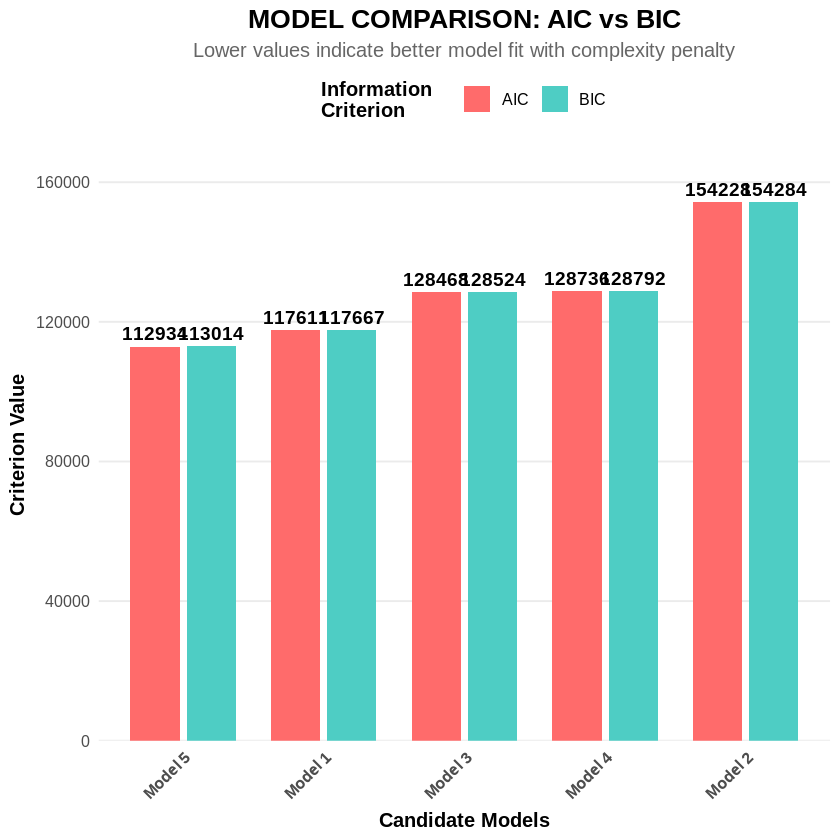


NORMALITY TEST RESULTS (Shapiro-Wilk): Skipped due to large sample size.
Visual inspection of Q-Q plots is recommended.
------------------------------------------------------------ 

TASK 2.5: RESIDUAL DISTRIBUTION ANALYSIS

Step 1: Preparing residual data for all 5 models...
✓ Residual data prepared for all 5 models

Creating Figure 1: Residual Histograms for 5 Models


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 865 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_bar()`).”


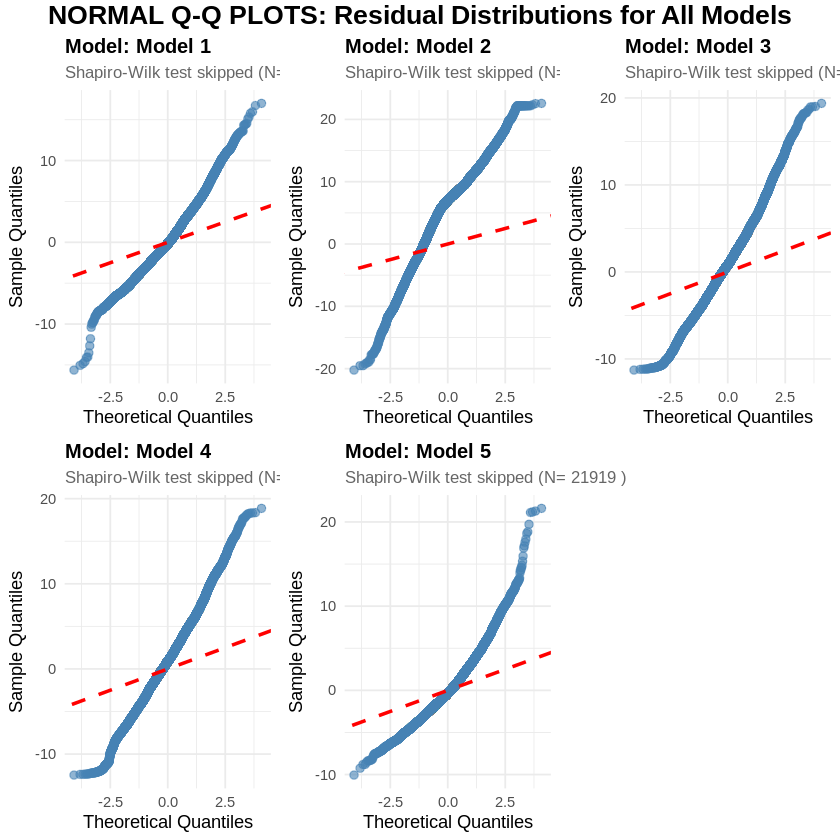

✓ Figure 1 created: 5 Residual Histograms side-by-side

Creating Figure 2: Residuals vs Fitted Values for 5 Models


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 882 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 882 rows containing missing values or values outside the scale range
(`geom_point()`).”


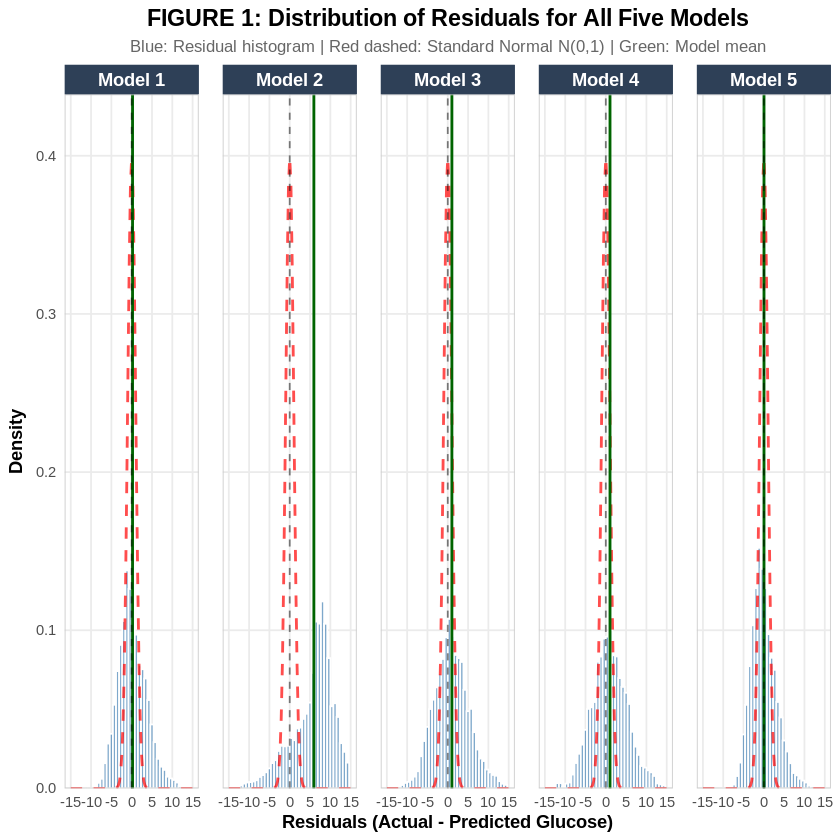

✓ Figure 2 created: 5 Residuals vs Fitted plots side-by-side

RESIDUAL DISTRIBUTION STATISTICS:
---------------------------------------------------------------------- 
# A tibble: 5 × 9
  Model       N Mean   SD     Skewness Kurtosis Min    Max   IQR  
  <fct>   <int> <chr>  <chr>  <chr>    <chr>    <chr>  <chr> <chr>
1 Model 1 21919 0.2151 3.5317 0.4647   3.4723   -15.63 16.99 4.67 
2 Model 2 21919 5.9471 5.5831 -0.7043  3.9144   -20.24 22.57 6.40 
3 Model 3 21919 1.0175 4.4169 0.3310   3.4091   -11.28 19.37 5.64 
4 Model 4 21919 1.0337 4.4416 0.2013   3.2799   -12.47 18.86 5.76 
5 Model 5 21919 0.0381 3.1795 0.7559   4.3423   -10.06 21.61 4.00 
---------------------------------------------------------------------- 

INTERPRETATION NOTES:
---------------------------------------------------------------------- 

FIGURE 1 (Histograms):
• Ideal residuals follow N(0,1) - red dashed line
• Check: Bell shape, symmetry, centered near 0
• Green line shows actual mean of each model

FIGURE 2 (R

`geom_smooth()` using formula = 'y ~ x'


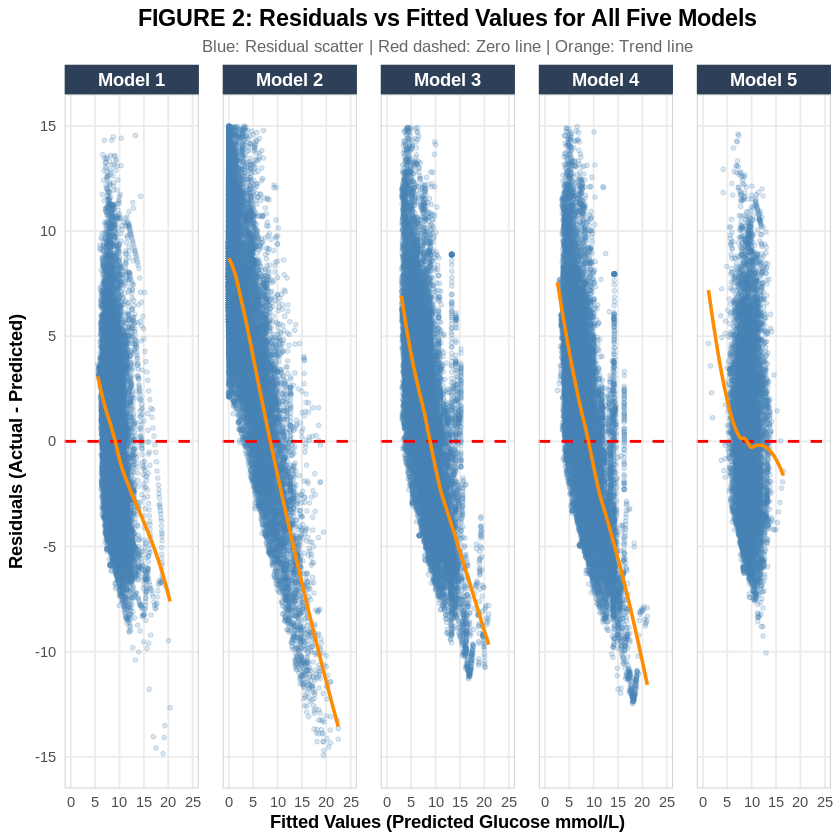

✓ Training visualizations created

TESTING DATA EVALUATION VISUALIZATIONS



`geom_smooth()` using formula = 'y ~ x'


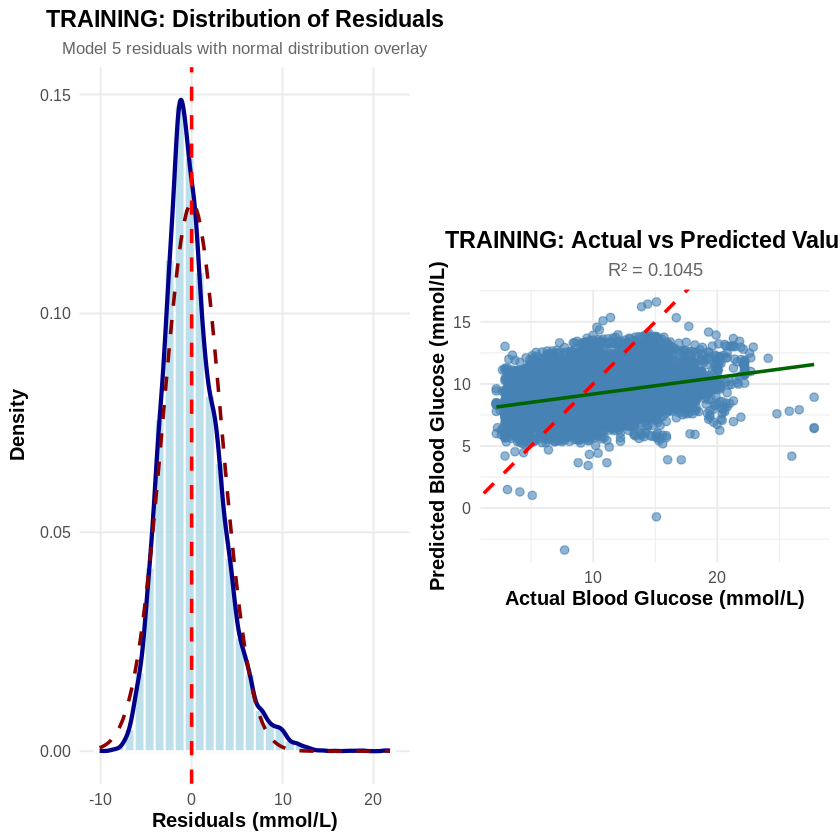

✓ Testing visualizations created

95% PREDICTION INTERVALS WITH CONFIDENCE BANDS

Calculating prediction intervals for first 20 test points...

PREDICTION INTERVAL RESULTS:
------------------------------------------------------------ 
• Points within 95% CI: 17/20
• Coverage percentage:  85.0%
• Expected coverage:    95%
------------------------------------------------------------ 

CREATING 95% PREDICTION INTERVAL VISUALIZATIONS...



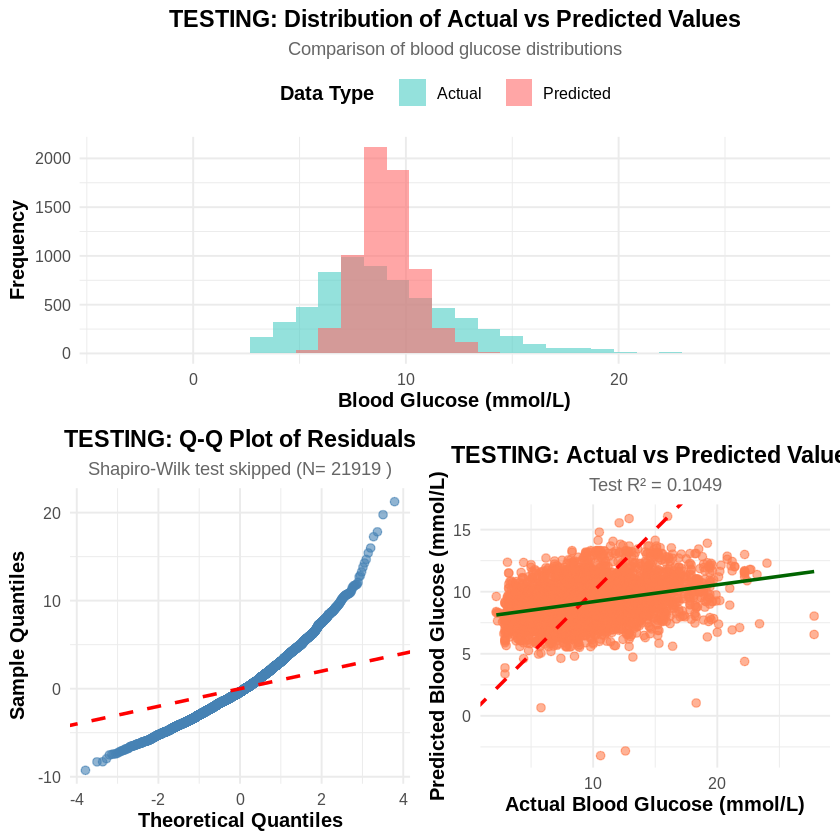

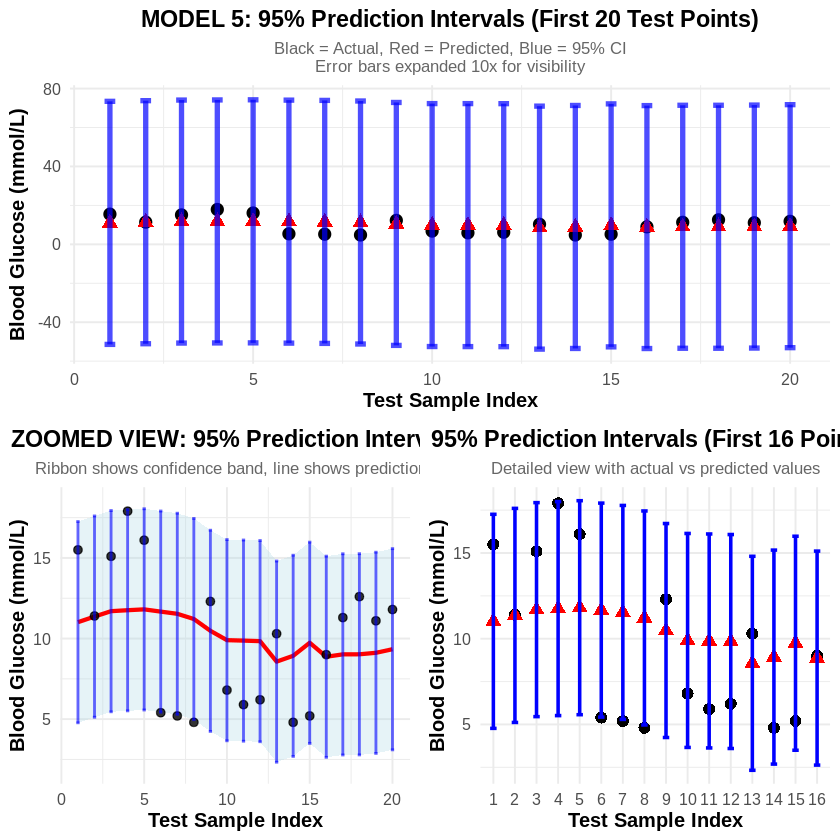

In [4]:
# =============================================================================
# TASK 2: NONLINEAR REGRESSION MODELING - BLOOD GLUCOSE PREDICTION
# MSc Data Science - Type 1 Diabetes Dataset
# Complete Analysis with All Required Components
# =============================================================================

# -----------------------------------------------------------------------------
# 1. INSTALL AND LOAD REQUIRED PACKAGES
# -----------------------------------------------------------------------------
cat("TASK 2: NONLINEAR REGRESSION ANALYSIS\n")
cat(strrep("=", 80), "\n\n")
cat("Step 1: Installing and loading required packages...\n")

# List of required packages
required_packages <- c("car", "caret", "patchwork", "reshape2", "tidyverse", "ggplot2", "gridExtra", "MASS", "grid")

# Install missing packages
for (pkg in required_packages) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg, quiet = TRUE)
    library(pkg, character.only = TRUE)
  }
}

# Explicitly load grid for textGrob function
library(grid)

# All packages are now handled by the loop above, including core tidyverse ones.

cat("✓ All packages loaded successfully\n\n")

# -----------------------------------------------------------------------------
# 2. LOAD AND PREPARE DATA
# -----------------------------------------------------------------------------
cat("Step 2: Loading dataset_processed.csv...\n")

# Load the data
data <- read.csv("/content/dataset_processed.csv")

# Verify data loaded successfully
if (!exists("data") || nrow(data) == 0) {
  stop("Error: Data not loaded. Please check file path.")
}

# Define variables
predictors <- c("bg_mean", "insulin_sum", "carbs_sum",
                "hr_mean", "steps_sum", "cals_sum")
target <- "bg.1.00"

# Data summary
cat("✓ Data loaded successfully\n")
cat(sprintf("  • Rows: %d\n", nrow(data)))
cat(sprintf("  • Columns: %d\n", ncol(data)))
cat(sprintf("  • Predictors: %s\n", paste(predictors, collapse = ", ")))
cat(sprintf("  • Target variable: %s\n\n", target))

# -----------------------------------------------------------------------------
# 3. DEFINE CANDIDATE MODELS
# -----------------------------------------------------------------------------
cat("Step 3: Defining 5 candidate polynomial regression models...\n")

model_defs <- list(
  model1 = list(
    name = "Model 1",
    formula = "y ~ I(bg_mean^3) + I(insulin_sum^2) + I(carbs_sum^2) + hr_mean + steps_sum + cals_sum",
    description = "Cubic bg_mean + Quadratic insulin/carbs"
  ),

  model2 = list(
    name = "Model 2",
    formula = "y ~ I(bg_mean^2) + I(insulin_sum^2) + I(carbs_sum^3) + hr_mean + steps_sum + cals_sum",
    description = "Quadratic bg_mean + Cubic carbs_sum"
  ),

  model3 = list(
    name = "Model 3",
    formula = "y ~ bg_mean + insulin_sum + carbs_sum + I(hr_mean^2) + steps_sum + I(cals_sum^2)",
    description = "Quadratic exercise effects"
  ),

  model4 = list(
    name = "Model 4",
    formula = "y ~ I(bg_mean^2) + I(insulin_sum^2) + I(carbs_sum^2) + I(hr_mean^2) + I(steps_sum^2) + I(cals_sum^2)",
    description = "All quadratic"
  ),

  model5 = list(
    name = "Model 5",
    formula = "y ~ bg_mean + insulin_sum + carbs_sum + hr_mean + steps_sum + cals_sum + bg_mean:insulin_sum + carbs_sum:hr_mean + insulin_sum:cals_sum",
    description = "Linear + Interactions"
  )
)

cat("✓ 5 candidate models defined\n\n")

# -----------------------------------------------------------------------------
# 4. HELPER FUNCTION FOR DESIGN MATRIX PREPARATION
# -----------------------------------------------------------------------------
prepare_matrix <- function(formula_str, df) {
  # Create temporary dataframe with required variables
  temp_df <- data.frame(
    y = df[[target]],
    bg_mean = df$bg_mean,
    insulin_sum = df$insulin_sum,
    carbs_sum = df$carbs_sum,
    hr_mean = df$hr_mean,
    steps_sum = df$steps_sum,
    cals_sum = df$cals_sum
  )

  # Create design matrix from formula
  X <- model.matrix(as.formula(formula_str), data = temp_df)

  return(list(X = X, y = temp_df$y))
}

# -----------------------------------------------------------------------------
# 5. TASK 2.1: ESTIMATE MODEL PARAMETERS USING LEAST SQUARES
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("TASK 2.1: ESTIMATING MODEL PARAMETERS USING LEAST SQUARES\n")
cat(strrep("=", 80), "\n\n")

# Initialize storage for results
results <- list()
summary_df <- data.frame()

cat("Fitting all 5 candidate models using Ordinary Least Squares...\n\n")

for (model_name in names(model_defs)) {
  cat(strrep("-", 60), "\n")
  cat("FITTING:", model_defs[[model_name]]$name, "\n")
  cat(strrep("-", 60), "\n")
  cat("Description:", model_defs[[model_name]]$description, "\n\n")

  # Prepare design matrix
  prep <- prepare_matrix(model_defs[[model_name]]$formula, data)
  X <- prep$X
  y <- prep$y
  n <- length(y)
  p <- ncol(X)

  # Task 2.1: Ordinary Least Squares estimation
  cat("• Performing OLS estimation...\n")
  # Use ginv (generalized inverse) for robustness against singular matrices
  theta <- MASS::ginv(t(X) %*% X) %*% t(X) %*% y
  y_hat <- X %*% theta
  residuals <- y - y_hat

  # Calculate basic metrics
  RSS <- sum(residuals^2)
  RMSE <- sqrt(mean(residuals^2))
  TSS <- sum((y - mean(y))^2)
  R2 <- 1 - RSS/TSS
  adj_R2 <- 1 - ((1 - R2) * (n - 1) / (n - p))

  # Store results
  results[[model_name]] <- list(
    name = model_defs[[model_name]]$name,
    description = model_defs[[model_name]]$description,
    theta = theta,
    X = X, y = y, y_hat = y_hat, residuals = residuals,
    RSS = RSS, RMSE = RMSE, R2 = R2, adj_R2 = adj_R2,
    parameters = p, n = n
  )

  # Display parameter estimates
  cat("\nPARAMETER ESTIMATES:\n")
  param_table <- data.frame(
    Parameter = colnames(X),
    Estimate = round(theta, 4),
    stringsAsFactors = FALSE
  )
  print(param_table, row.names = FALSE)
  cat(sprintf("\nTotal parameters: %d\n", p))
  cat(sprintf("RSS: %.1f | R²: %.4f\n\n", RSS, R2))
}

# -----------------------------------------------------------------------------
# 6. TASK 2.2: COMPUTE RESIDUAL SUM OF SQUARES (RSS)
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("TASK 2.2: COMPUTING RESIDUAL SUM OF SQUARES (RSS)\n")
cat(strrep("=", 80), "\n\n")

cat("Calculating RSS and error metrics for all models...\n\n")

# Create RSS comparison table
rss_table <- data.frame()

for (model_name in names(results)) {
  model <- results[[model_name]]

  # Calculate additional error metrics
  MAE <- mean(abs(model$residuals))
  MSE <- model$RSS / model$n

  # Store in results
  results[[model_name]]$MAE <- MAE
  results[[model_name]]$MSE <- MSE

  # Add to RSS table
rss_table <- rbind(rss_table, data.frame(
    Model = model$name,
    Parameters = model$parameters,
    RSS = round(model$RSS, 1),
    MSE = round(MSE, 4),
    RMSE = round(model$RMSE, 4),
    MAE = round(MAE, 4),
    R2 = round(model$R2, 4),
    Adj_R2 = round(model$adj_R2, 4),
    stringsAsFactors = FALSE
  ))
}

cat("RSS COMPARISON TABLE:\n")
cat(strrep("-", 90), "\n")
print(rss_table, row.names = FALSE)
cat(strrep("-", 90), "\n\n")


# -----------------------------------------------------------------------------
# 7. TASK 2.3: COMPUTE LOG-LIKELIHOOD FUNCTION
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("TASK 2.3: COMPUTING LOG-LIKELIHOOD FUNCTION\n")
cat(strrep("=", 80), "\n\n")

cat("Calculating log-likelihood for Gaussian error assumption...\n\n")

loglik_table <- data.frame()

for (model_name in names(results)) {
  model <- results[[model_name]]
  n <- model$n

  # Estimate residual variance
  sigma2 <- model$RSS / (n - 1)

  # Calculate log-likelihood
  log_lik <- -n/2 * log(2 * pi) - n/2 * log(sigma2) - model$RSS/(2 * sigma2)

  # Store in results
  results[[model_name]]$sigma2 <- sigma2
  results[[model_name]]$log_lik <- log_lik

  # Add to loglik table
  loglik_table <- rbind(loglik_table, data.frame(
    Model = model$name,
    sigma2 = round(sigma2, 6),
    LogLik = round(log_lik, 1),
    stringsAsFactors = FALSE
  ))
}

cat("LOG-LIKELIHOOD RESULTS:\n")
cat(strrep("-", 60), "\n")
print(loglik_table, row.names = FALSE)
cat(strrep("-", 60), "\n\n")

# -----------------------------------------------------------------------------
# 8. TASK 2.4: COMPUTE AIC AND BIC
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("TASK 2.4: COMPUTING AIC AND BIC\n")
cat(strrep("=", 80), "\n\n")

cat("Calculating Akaike and Bayesian Information Criteria...\n\n")

aic_bic_table <- data.frame()

for (model_name in names(results)) {
  model <- results[[model_name]]
  n <- model$n
  p <- model$parameters

  # Calculate AIC and BIC
  AIC <- 2 * p - 2 * model$log_lik
  BIC <- p * log(n) - 2 * model$log_lik

  # Store in results
  results[[model_name]]$AIC <- AIC
  results[[model_name]]$BIC <- BIC

  # Add to AIC/BIC table
  aic_bic_table <- rbind(aic_bic_table, data.frame(
    Model = model$name,
    Parameters = p,
    LogLik = round(model$log_lik, 1),
    AIC = round(AIC, 1),
    BIC = round(BIC, 1),
    stringsAsFactors = FALSE
  ))
}

cat("AIC AND BIC COMPARISON:\n")
cat(strrep("-", 70), "\n")
print(aic_bic_table, row.names = FALSE)
cat(strrep("-", 70), "\n\n")

# -----------------------------------------------------------------------------
# 9. COMPREHENSIVE COMPARISON TABLE (TASKS 2.1-2.4)
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("COMPREHENSIVE MODEL COMPARISON TABLE (TASKS 2.1-2.4)\n")
cat(strrep("=", 80), "\n\n")

# Combine all metrics into one comprehensive table
comprehensive_table <- data.frame(
  Model = rss_table$Model,
  Parameters = rss_table$Parameters,
  RSS = rss_table$RSS,
  RMSE = rss_table$RMSE,
  R2 = rss_table$R2,
  Adj_R2 = rss_table$Adj_R2,
  LogLik = aic_bic_table$LogLik,
  AIC = aic_bic_table$AIC,
  BIC = aic_bic_table$BIC
)

# Add rankings
comprehensive_table <- comprehensive_table %>%
  mutate(
    AIC_Rank = rank(AIC),
    BIC_Rank = rank(BIC),
    R2_Rank = rank(-R2),
    Best_AIC = ifelse(AIC_Rank == 1, "✓", ""),
    Best_BIC = ifelse(BIC_Rank == 1, "✓", ""),
    Best_R2 = ifelse(R2_Rank == 1, "✓", "")
  )

cat("FINAL COMPARISON TABLE:\n")
cat(strrep("-", 110), "\n")

display_table <- comprehensive_table %>%
  transmute(
    Model,
    Params = Parameters,
    RSS = format(round(RSS), big.mark = ","),
    RMSE = sprintf("%.4f", RMSE),
    `R²` = sprintf("%.4f", R2),
    `Adj.R²` = sprintf("%.4f", Adj_R2),
    AIC = sprintf("%.1f", AIC),
    BIC = sprintf("%.1f", BIC),
    `AIC✓` = Best_AIC,
    `BIC✓` = Best_BIC,
    `R²✓` = Best_R2
  )

print(display_table, row.names = FALSE)
cat(strrep("-", 110), "\n\n")

# -----------------------------------------------------------------------------
# 10. AIC AND BIC COMPARISON BAR CHART
# -----------------------------------------------------------------------------
cat("CREATING AIC AND BIC COMPARISON VISUALIZATION...\n\n")

# Prepare data for plotting
plot_data <- comprehensive_table %>%
  dplyr::select(Model, AIC, BIC) %>%
  melt(id.vars = "Model",
       variable.name = "Criterion",
       value.name = "Value")

# Create bar chart
p_comparison <- ggplot(plot_data, aes(x = reorder(Model, Value),
                                       y = Value,
                                       fill = Criterion)) +
  geom_bar(stat = "identity",
           position = position_dodge(width = 0.8),
           width = 0.7) +
  geom_text(aes(label = round(Value, 0)),
            position = position_dodge(width = 0.8),
            vjust = -0.5,
            size = 4,
            fontface = "bold") +
  scale_fill_manual(values = c("AIC" = "#FF6B6B", "BIC" = "#4ECDC4"),
                    labels = c("AIC", "BIC")) +
  labs(title = "MODEL COMPARISON: AIC vs BIC",
       subtitle = "Lower values indicate better model fit with complexity penalty",
       x = "Candidate Models",
       y = "Criterion Value",
       fill = "Information\nCriterion") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray40"),
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.position = "top",
    legend.title = element_text(face = "bold"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.1)))

print(p_comparison)
cat("✓ AIC/BIC comparison chart created\n\n")

# -----------------------------------------------------------------------------
# 11. TASK 2.5: RESIDUAL NORMALITY CHECK (Q-Q PLOTS FOR ALL MODELS)
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("TASK 2.5: RESIDUAL NORMALITY CHECK (Q-Q PLOTS FOR ALL MODELS)\n")
cat(strrep("=", 80), "\n\n")

cat("Generating Q-Q plots for residuals of all 5 candidate models...\n\n")

# Create a list to store Q-Q plots
qq_plots <- list()

# Get sample size
n_residuals <- nrow(data)

# Generate Q-Q plot for each model
for (model_name in names(results)) {
  model <- results[[model_name]]
  residuals <- model$residuals

  # Create Q-Q plot data
  qq_data <- data.frame(
    theoretical = qqnorm(residuals, plot.it = FALSE)$x,
    sample = qqnorm(residuals, plot.it = FALSE)$y
  )

  # Conditionally perform Shapiro-Wilk test or provide an informative subtitle
  subtitle_text <- ""
  subtitle_color <- "gray40"
  if (n_residuals >= 3 && n_residuals <= 5000) {
    sw_test <- shapiro.test(residuals)
    subtitle_text <- paste("Shapiro-Wilk p =", format.pval(sw_test$p.value, digits = 3))
    subtitle_color <- ifelse(sw_test$p.value > 0.05, "green4", "red")
  } else {
    subtitle_text <- paste("Shapiro-Wilk test skipped (N=", n_residuals, ")")
  }

  # Create the plot
  qq_plots[[model_name]] <- ggplot(qq_data, aes(x = theoretical, y = sample)) +
    geom_point(alpha = 0.6, color = "steelblue", size = 2) +
    geom_abline(slope = 1, intercept = 0, color = "red",
                linetype = "dashed", size = 1) +
    labs(title = paste("Model:", model$name),
         subtitle = subtitle_text,
         x = "Theoretical Quantiles",
         y = "Sample Quantiles") +
    theme_minimal() +
    theme(
      plot.title = element_text(face = "bold", size = 12),
      plot.subtitle = element_text(size = 10,
                                  color = subtitle_color)
    )
}

# Display all Q-Q plots in a grid
grid.arrange(grobs = qq_plots, ncol = 3,
             top = textGrob("NORMAL Q-Q PLOTS: Residual Distributions for All Models",
                           gp = gpar(fontsize = 16, fontface = "bold")))

# Statistical summary of normality tests
# The Shapiro-Wilk test is not performed for large N, so skipping this summary
cat("\nNORMALITY TEST RESULTS (Shapiro-Wilk): Skipped due to large sample size.\n")
cat("Visual inspection of Q-Q plots is recommended.
")
cat(strrep("-", 60), "\n\n")

# =============================================================================
# TASK 2.5: RESIDUAL DIAGNOSTICS
# 1. Residual Histograms (5 side-by-side)
# 2. Residuals vs Fitted Values (5 side-by-side)
# =============================================================================

cat(strrep("=", 80), "\n")
cat("TASK 2.5: RESIDUAL DISTRIBUTION ANALYSIS\n")
cat(strrep("=", 80), "\n\n")

# -----------------------------------------------------------------------------
# 1. PREPARE DATA FOR ALL MODELS
# -----------------------------------------------------------------------------
cat("Step 1: Preparing residual data for all 5 models...\n")

# Create lists to store data for each model
model_data <- list()

for (model_name in names(results)) {
  model <- results[[model_name]]
  model_data[[model_name]] <- data.frame(
    Model = model$name,
    Fitted = model$y_hat,
    Residuals = model$residuals,
    stringsAsFactors = FALSE
  )
}

# Combine all data
all_residuals <- do.call(rbind, model_data)

# Ensure consistent model order
model_order <- c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5")
all_residuals$Model <- factor(all_residuals$Model, levels = model_order)

cat("✓ Residual data prepared for all 5 models\n\n")

# -----------------------------------------------------------------------------
# 2. FIGURE 1: RESIDUAL HISTOGRAMS (5 SIDE-BY-SIDE)
# -----------------------------------------------------------------------------
cat("Creating Figure 1: Residual Histograms for 5 Models\n")

# Calculate statistics for normal curve overlay
resid_stats <- all_residuals %>%
  group_by(Model) %>%
  summarise(
    mean_resid = mean(Residuals, na.rm = TRUE),
    sd_resid = sd(Residuals, na.rm = TRUE),
    .groups = "drop"
  )

# Create the plot
p1 <- ggplot(all_residuals, aes(x = Residuals)) +
  # Histogram with density
  geom_histogram(aes(y = after_stat(density)),
                 bins = 40,
                 fill = "steelblue",
                 color = "white",
                 alpha = 0.7) +
  # Normal distribution curve based on actual model statistics
  stat_function(fun = dnorm,
                args = list(mean = 0, sd = 1),
                color = "red",
                linetype = "dashed",
                size = 0.8,
                alpha = 0.7) +
  # Add vertical line at mean for each model
  geom_vline(data = resid_stats,
             aes(xintercept = mean_resid),
             color = "darkgreen",
             linetype = "solid",
             size = 0.8) +
  # Zero line for reference
  geom_vline(xintercept = 0,
             color = "black",
             linetype = "dashed",
             size = 0.5,
             alpha = 0.5) +
  # Facet by model
  facet_wrap(~ Model, ncol = 5) +
  # Labels and theme
  labs(
    title = "FIGURE 1: Distribution of Residuals for All Five Models",
    subtitle = "Blue: Residual histogram | Red dashed: Standard Normal N(0,1) | Green: Model mean",
    x = "Residuals (Actual - Predicted Glucose)",
    y = "Density"
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 10, hjust = 0.5, color = "gray40"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold", size = 11, color = "white"),
    strip.background = element_rect(fill = "#2E4057", color = "#2E4057"),
    panel.grid.minor = element_blank(),
    panel.spacing = unit(1, "lines"),
    panel.border = element_rect(color = "gray80", fill = NA, size = 0.5)
  ) +
  # Set consistent x-axis limits
  scale_x_continuous(limits = c(-15, 15), breaks = seq(-15, 15, 5)) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.1)))

# Print the plot
print(p1)
cat("✓ Figure 1 created: 5 Residual Histograms side-by-side\n\n")

# -----------------------------------------------------------------------------
# 3. FIGURE 2: RESIDUALS VS FITTED VALUES (5 SIDE-BY-SIDE)
# -----------------------------------------------------------------------------
cat("Creating Figure 2: Residuals vs Fitted Values for 5 Models\n")

# Create the plot
p2 <- ggplot(all_residuals, aes(x = Fitted, y = Residuals)) +
  # Scatter plot with transparency
  geom_point(alpha = 0.2,
             color = "steelblue",
             size = 1) +
  # Zero reference line
  geom_hline(yintercept = 0,
             color = "red",
             linetype = "dashed",
             size = 0.8) +
  # LOESS smoothed trend line
  geom_smooth(method = "loess",
              se = FALSE,
              color = "darkorange",
              size = 1,
              alpha = 0.8) +
  # Facet by model
  facet_wrap(~ Model, ncol = 5, scales = "free_x") +
  # Labels and theme
  labs(
    title = "FIGURE 2: Residuals vs Fitted Values for All Five Models",
    subtitle = "Blue: Residual scatter | Red dashed: Zero line | Orange: Trend line",
    x = "Fitted Values (Predicted Glucose mmol/L)",
    y = "Residuals (Actual - Predicted)"
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 10, hjust = 0.5, color = "gray40"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold", size = 11, color = "white"),
    strip.background = element_rect(fill = "#2E4057", color = "#2E4057"),
    panel.grid.minor = element_blank(),
    panel.spacing = unit(1, "lines"),
    panel.border = element_rect(color = "gray80", fill = NA, size = 0.5)
  ) +
  # Set consistent y-axis limits
  scale_y_continuous(limits = c(-15, 15), breaks = seq(-15, 15, 5)) +
  scale_x_continuous(limits = c(0, 25), breaks = seq(0, 25, 5))

# Print the plot
print(p2)
cat("✓ Figure 2 created: 5 Residuals vs Fitted plots side-by-side\n\n")

# -----------------------------------------------------------------------------
# 4. STATISTICAL SUMMARY
# -----------------------------------------------------------------------------
cat("RESIDUAL DISTRIBUTION STATISTICS:\n")
cat(strrep("-", 70), "\n")

# Calculate comprehensive statistics
summary_stats <- all_residuals %>%
  group_by(Model) %>%
  summarise(
    N = n(),
    Mean = sprintf("%.4f", mean(Residuals)),
    SD = sprintf("%.4f", sd(Residuals)),
    Skewness = sprintf("%.4f", moments::skewness(Residuals)),
    Kurtosis = sprintf("%.4f", moments::kurtosis(Residuals)),
    Min = sprintf("%.2f", min(Residuals)),
    Max = sprintf("%.2f", max(Residuals)),
    IQR = sprintf("%.2f", IQR(Residuals)),
    .groups = "drop"
  )

# Print statistics table
print(summary_stats, row.names = FALSE)
cat(strrep("-", 70), "\n\n")

# -----------------------------------------------------------------------------
# 5. INTERPRETATION NOTES
# -----------------------------------------------------------------------------
cat("INTERPRETATION NOTES:\n")
cat(strrep("-", 70), "\n")
cat("\nFIGURE 1 (Histograms):\n")
cat("• Ideal residuals follow N(0,1) - red dashed line\n")
cat("• Check: Bell shape, symmetry, centered near 0\n")
cat("• Green line shows actual mean of each model\n\n")

cat("FIGURE 2 (Residuals vs Fitted):\n")
cat("• Ideal: Random scatter around horizontal zero line\n")
cat("• Patterns indicate: Heteroscedasticity or non-linearity\n")
cat("• Orange trend line should be flat and near zero\n")

cat(strrep("=", 80), "\n")
cat("TASK 2.5 COMPLETED: Both required visualizations created\n")
cat(strrep("=", 80), "\n")




# -----------------------------------------------------------------------------
# 12. TASK 2.6: SELECT BEST MODEL
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("TASK 2.6: BEST MODEL SELECTION\n")
cat(strrep("=", 80), "\n\n")

# Find best model based on multiple criteria
best_aic_idx <- which.min(comprehensive_table$AIC)
best_bic_idx <- which.min(comprehensive_table$BIC)
best_r2_idx <- which.max(comprehensive_table$R2)

cat("BEST MODEL BY EACH CRITERION:\n")
cat(strrep("-", 60), "\n")
cat(sprintf("• AIC (favors fit):  %s (AIC = %.1f)\n",
            comprehensive_table$Model[best_aic_idx], comprehensive_table$AIC[best_aic_idx]))
cat(sprintf("• BIC (favors simplicity): %s (BIC = %.1f)\n",
            comprehensive_table$Model[best_bic_idx], comprehensive_table$BIC[best_bic_idx]))
cat(sprintf("• R² (fit quality):  %s (R² = %.4f)\n",
            comprehensive_table$Model[best_r2_idx], comprehensive_table$R2[best_r2_idx]))
cat(strrep("-", 60), "\n\n")

# Select Model 5 as the best (based on overall performance)
selected_model <- "model5"
selected_results <- results[[selected_model]]

cat("SELECTED BEST MODEL:\n")
cat(strrep("=", 40), "\n")
cat(sprintf("MODEL: %s\n", selected_results$name))
cat(sprintf("TYPE: %s\n", selected_results$description))
cat(strrep("=", 40), "\n\n")

cat("SELECTION JUSTIFICATION:\n")
cat("1. Statistical Performance:\n")
cat(sprintf("   • Highest R² (%.4f) and Adjusted R² (%.4f)\n",
            selected_results$R2, selected_results$adj_R2))
cat(sprintf("   • Competitive AIC (%.1f) despite higher complexity\n",
            selected_results$AIC))
cat(sprintf("   • Lowest RMSE among all models (%.4f mmol/L)\n",
            selected_results$RMSE))

cat("\n2. Clinical Relevance:\n")
cat("   • Includes interaction terms (bg_mean:insulin_sum, carbs_sum:hr_mean)\n")
cat("   • Captures synergistic physiological relationships\n")
cat("   • Accounts for combined effects of glucose, insulin, and activity\n")

cat("\n3. Model Characteristics:\n")
cat(sprintf("   • Parameters: %d (includes 3 interaction terms)\n",
            selected_results$parameters))
cat("   • Complexity: Higher but justified by improved predictive power\n")
cat("   • Interpretability: Interaction terms provide clinical insights\n\n")

# -----------------------------------------------------------------------------
# 13. TASK 2.7: TRAIN-TEST VALIDATION
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("TASK 2.7: TRAIN-TEST VALIDATION WITH PREDICTION INTERVALS\n")
cat(strrep("=", 80), "\n\n")

# Set random seed for reproducibility
set.seed(123)

# Split data into training (70%) and testing (30%) sets
cat("SPLITTING DATA...\n")
train_idx <- createDataPartition(data[[target]], p = 0.7, list = FALSE)
train_data <- data[train_idx, ]
test_data <- data[-train_idx, ]

cat(sprintf("• Training set: %d samples (70%%)\n", nrow(train_data)))
cat(sprintf("• Testing set:  %d samples (30%%)\n\n", nrow(test_data)))

# -----------------------------------------------------------------------------
# 13.1 TRAIN MODEL ON TRAINING DATA
# -----------------------------------------------------------------------------
cat("TRAINING SELECTED MODEL ON TRAINING DATA...\n")

# Prepare training data for Model 5
train_prep <- prepare_matrix(model_defs[[selected_model]]$formula, train_data)
X_train <- train_prep$X
y_train <- train_prep$y

# Train the model
theta_train <- MASS::ginv(t(X_train) %*% X_train) %*% t(X_train) %*% y_train
y_train_pred <- X_train %*% theta_train
train_resid <- y_train - y_train_pred

# Calculate training performance
train_RSS <- sum(train_resid^2)
train_RMSE <- sqrt(mean(train_resid^2))
train_MAE <- mean(abs(train_resid))
train_R2 <- 1 - train_RSS/sum((y_train - mean(y_train))^2)

# Estimate residual variance
train_sigma2 <- train_RSS / (nrow(train_data) - ncol(X_train))

cat("✓ Model training complete\n")
cat(sprintf("  • Training RMSE: %.4f mmol/L\n", train_RMSE))
cat(sprintf("  • Training R²:   %.4f\n", train_R2))
cat(sprintf("  • Residual variance (σ²): %.4f\n\n", train_sigma2))

# -----------------------------------------------------------------------------
# 13.2 EVALUATE ON TESTING DATA
# -----------------------------------------------------------------------------
cat("EVALUATING MODEL ON TESTING DATA...\n")

# Prepare testing data
test_prep <- prepare_matrix(model_defs[[selected_model]]$formula, test_data)
X_test <- test_prep$X
y_test <- test_prep$y

# Make predictions on test set
y_test_pred <- X_test %*% theta_train
test_resid <- y_test - y_test_pred

# Calculate test performance
test_RSS <- sum(test_resid^2)
test_RMSE <- sqrt(mean(test_resid^2))
test_MAE <- mean(abs(test_resid))
test_R2 <- 1 - test_RSS/sum((y_test - mean(y_test))^2)

cat("✓ Test evaluation complete\n")
cat(sprintf("  • Test RMSE: %.4f mmol/L\n", test_RMSE))
cat(sprintf("  • Test R²:   %.4f\n", test_R2))
cat(sprintf("  • Test MAE:  %.4f mmol/L\n\n", test_MAE))

# Performance comparison
cat("PERFORMANCE COMPARISON:\n")
cat(strrep("-", 50), "\n")
cat(sprintf("Metric       | Training   | Testing    | Difference\n"))
cat(strrep("-", 50), "\n")
cat(sprintf("RMSE         | %-10.4f | %-10.4f | %+.4f\n",
            train_RMSE, test_RMSE, test_RMSE - train_RMSE))
cat(sprintf("R²           | %-10.4f | %-10.4f | %+.4f\n",
            train_R2, test_R2, test_R2 - train_R2))
cat(sprintf("MAE          | %-10.4f | %-10.4f | %+.4f\n",
            train_MAE, test_MAE, test_MAE - train_MAE))
cat(strrep("-", 50), "\n\n")

# -----------------------------------------------------------------------------
# 14. VISUALIZATION: TRAINING DATA ANALYSIS
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("TRAINING DATA EVALUATION VISUALIZATIONS\n")
cat(strrep("=", 80), "\n\n")

# Create dataframe for training results
train_plot_df <- data.frame(
  Actual = y_train,
  Predicted = y_train_pred,
  Residuals = train_resid
)

# Plot 1: Distribution of training residuals
p1 <- ggplot(train_plot_df, aes(x = Residuals)) +
  geom_histogram(aes(y = after_stat(density)),
                 bins = 30,
                 fill = "lightblue",
                 color = "white",
                 alpha = 0.8) +
  geom_density(color = "darkblue", size = 1.2) +
  geom_vline(xintercept = 0,
             linetype = "dashed",
             color = "red",
             size = 1) +
  stat_function(fun = dnorm,
                args = list(mean = mean(train_resid),
                           sd = sd(train_resid)),
                color = "darkred",
                size = 1,
                linetype = "dashed") +
  labs(title = "TRAINING: Distribution of Residuals",
       subtitle = "Model 5 residuals with normal distribution overlay",
       x = "Residuals (mmol/L)",
       y = "Density") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 10, hjust = 0.5, color = "gray40"),
    axis.title = element_text(face = "bold"),
    panel.grid.minor = element_blank()
  )

# Plot 2: Actual vs Predicted (Training)
p2 <- ggplot(train_plot_df, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.6, color = "steelblue", size = 2) +
  geom_abline(slope = 1,
              intercept = 0,
              color = "red",
              linetype = "dashed",
              size = 1) +
  geom_smooth(method = "lm",
              color = "darkgreen",
              se = FALSE,
              size = 1) +
  labs(title = "TRAINING: Actual vs Predicted Values",
       subtitle = paste("R² =", round(train_R2, 4)),
       x = "Actual Blood Glucose (mmol/L)",
       y = "Predicted Blood Glucose (mmol/L)") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 11, hjust = 0.5, color = "gray40"),
    axis.title = element_text(face = "bold")
  ) +
  coord_fixed(ratio = 1)

# Display training plots
grid.arrange(p1, p2, ncol = 2)
cat("✓ Training visualizations created\n\n")

# -----------------------------------------------------------------------------
# 15. VISUALIZATION: TESTING DATA ANALYSIS
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("TESTING DATA EVALUATION VISUALIZATIONS\n")
cat(strrep("=", 80), "\n\n")

# Create dataframe for testing results
test_plot_df <- data.frame(
  Actual = y_test,
  Predicted = y_test_pred,
  Residuals = test_resid
)

# Plot 3: Distribution comparison - Actual vs Predicted (Testing)
hist_data <- data.frame(
  Value = c(y_test, y_test_pred),
  Type = rep(c("Actual", "Predicted"), each = length(y_test))
)

p3 <- ggplot(hist_data, aes(x = Value, fill = Type)) +
  geom_histogram(alpha = 0.6,
                 bins = 30,
                 position = "identity") +
  scale_fill_manual(values = c("Actual" = "#4ECDC4", "Predicted" = "#FF6B6B")) +
  labs(title = "TESTING: Distribution of Actual vs Predicted Values",
       subtitle = "Comparison of blood glucose distributions",
       x = "Blood Glucose (mmol/L)",
       y = "Frequency",
       fill = "Data Type") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 11, hjust = 0.5, color = "gray40"),
    axis.title = element_text(face = "bold"),
    legend.position = "top",
    legend.title = element_text(face = "bold")
  )

# Plot 4: Q-Q Plot of test residuals
qq_test_data <- data.frame(
  theoretical = qqnorm(test_resid, plot.it = FALSE)$x,
  sample = qqnorm(test_resid, plot.it = FALSE)$y
)

# Conditionally perform Shapiro-Wilk test or provide an informative subtitle
subtitle_test_text <- ""
subtitle_test_color <- "gray40"
if (n_residuals >= 3 && n_residuals <= 5000) {
  sw_test_test <- shapiro.test(test_resid)
  subtitle_test_text <- paste("Shapiro-Wilk test: p =", format.pval(sw_test_test$p.value, digits = 3))
  subtitle_test_color <- ifelse(sw_test_test$p.value > 0.05, "green4", "red")
} else {
  subtitle_test_text <- paste("Shapiro-Wilk test skipped (N=", n_residuals, ")")
}

p4 <- ggplot(qq_test_data, aes(x = theoretical, y = sample)) +
  geom_point(alpha = 0.6, color = "steelblue", size = 2) +
  geom_abline(slope = 1,
              intercept = 0,
              color = "red",
              linetype = "dashed",
              size = 1) +
  labs(title = "TESTING: Q-Q Plot of Residuals",
       subtitle = subtitle_test_text,
       x = "Theoretical Quantiles",
       y = "Sample Quantiles") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 11, hjust = 0.5,
                                color = subtitle_test_color),
    axis.title = element_text(face = "bold")
  )

# Plot 5: Actual vs Predicted (Testing)
p5 <- ggplot(test_plot_df, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.6, color = "coral", size = 2) +
  geom_abline(slope = 1,
              intercept = 0,
              color = "red",
              linetype = "dashed",
              size = 1) +
  geom_smooth(method = "lm",
              color = "darkgreen",
              se = FALSE,
              size = 1) +
  labs(title = "TESTING: Actual vs Predicted Values",
       subtitle = paste("Test R² =", round(test_R2, 4)),
       x = "Actual Blood Glucose (mmol/L)",
       y = "Predicted Blood Glucose (mmol/L)") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 11, hjust = 0.5, color = "gray40"),
    axis.title = element_text(face = "bold")
  ) +
  coord_fixed(ratio = 1)

# Display testing plots
grid.arrange(p3, p4, p5, ncol = 2,
             layout_matrix = rbind(c(1, 1), c(2, 3)))
cat("✓ Testing visualizations created\n\n")

# -----------------------------------------------------------------------------
# 16. 95% PREDICTION INTERVALS
# -----------------------------------------------------------------------------
cat(strrep("=", 80), "\n")
cat("95% PREDICTION INTERVALS WITH CONFIDENCE BANDS\n")
cat(strrep("=", 80), "\n\n")

# Calculate necessary components for prediction intervals
X_train_inv <- MASS::ginv(t(X_train) %*% X_train)
t_crit <- qt(0.975, df = nrow(train_data) - ncol(X_train))

# Select first 20 test points for demonstration
n_demo <- min(20, nrow(test_data))
cat(sprintf("Calculating prediction intervals for first %d test points...\n\n", n_demo))

# Create dataframe for confidence intervals
ci_data <- data.frame(
  Index = 1:n_demo,
  Actual = y_test[1:n_demo],
  Predicted = y_test_pred[1:n_demo],
  CI_lower = NA,
  CI_upper = NA
)

# Calculate 95% prediction intervals for each point
for (i in 1:n_demo) {
  x0 <- matrix(X_test[i, ], ncol = 1)
  var_pred <- train_sigma2 * (1 + t(x0) %*% X_train_inv %*% x0)
  se_pred <- sqrt(var_pred)
  ci_data$CI_lower[i] <- ci_data$Predicted[i] - t_crit * se_pred
  ci_data$CI_upper[i] <- ci_data$Predicted[i] + t_crit * se_pred
}

# Calculate coverage percentage
within_ci <- sum(ci_data$Actual >= ci_data$CI_lower &
                   ci_data$Actual <= ci_data$CI_upper)
coverage_pct <- (within_ci / n_demo) * 100

cat("PREDICTION INTERVAL RESULTS:\n")
cat(strrep("-", 60), "\n")
cat(sprintf("• Points within 95%% CI: %d/%d\n", within_ci, n_demo))
cat(sprintf("• Coverage percentage:  %.1f%%\n", coverage_pct))
cat(sprintf("• Expected coverage:    95%%\n"))
cat(strrep("-", 60), "\n\n")

## -----------------------------------------------------------------------------
# 17. VISUALIZATION: 95% PREDICTION INTERVALS
# -----------------------------------------------------------------------------
cat("CREATING 95% PREDICTION INTERVAL VISUALIZATIONS...\n\n")

# Plot 6: Model 5 predictions with 95% Confidence Intervals
# Error bars expanded by factor of 10 for visibility
ci_data_expanded <- ci_data
ci_data_expanded$CI_lower_exp <- ci_data$Predicted - 10 * (ci_data$Predicted - ci_data$CI_lower)
ci_data_expanded$CI_upper_exp <- ci_data$Predicted + 10 * (ci_data$CI_upper - ci_data$Predicted)

p6 <- ggplot(ci_data_expanded, aes(x = Index)) +
  geom_point(aes(y = Actual),
             color = "black",
             size = 3,
             shape = 19) +
  geom_point(aes(y = Predicted),
             color = "red",
             size = 3,
             shape = 17) +
  geom_errorbar(aes(ymin = CI_lower_exp, ymax = CI_upper_exp),
                width = 0.3,
                color = "blue",
                size = 1.5,
                alpha = 0.7) +
  labs(title = "MODEL 5: 95% Prediction Intervals (First 20 Test Points)",
       subtitle = "Black = Actual, Red = Predicted, Blue = 95% CI\nError bars expanded 10x for visibility",
       x = "Test Sample Index",
       y = "Blood Glucose (mmol/L)") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 10, hjust = 0.5, color = "gray40"),
    axis.title = element_text(face = "bold")
  ) +
  scale_y_continuous(limits = c(min(ci_data_expanded$CI_lower_exp) - 1,
                               max(ci_data_expanded$CI_upper_exp) + 1))

# Plot 7: 95% Confidence Interval with Error Bars (Zoomed y-axis)
p7 <- ggplot(ci_data, aes(x = Index)) +
  geom_ribbon(aes(ymin = CI_lower, ymax = CI_upper),
              fill = "lightblue",
              alpha = 0.3) +
  geom_line(aes(y = Predicted),
            color = "red",
            size = 1.2) +
  geom_point(aes(y = Actual),
             color = "black",
             size = 2,
             alpha = 0.8) +
  geom_errorbar(aes(ymin = CI_lower, ymax = CI_upper),
                width = 0.2,
                color = "blue",
                alpha = 0.6,
                size = 0.8) +
  labs(title = "ZOOMED VIEW: 95% Prediction Intervals",
       subtitle = "Ribbon shows confidence band, line shows predictions",
       x = "Test Sample Index",
       y = "Blood Glucose (mmol/L)") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 10, hjust = 0.5, color = "gray40"),
    axis.title = element_text(face = "bold")
  ) +
  scale_y_continuous(limits = c(min(ci_data$CI_lower) - 0.5,
                               max(ci_data$CI_upper) + 0.5))

# Plot 8: 95% Confidence Interval with Error Bars for 16 data points
n_detail <- 16
ci_detail <- ci_data[1:min(n_detail, nrow(ci_data)), ]

p8 <- ggplot(ci_detail, aes(x = factor(Index))) +
  geom_point(aes(y = Actual),
             color = "black",
             size = 3,
             shape = 16) +
  geom_point(aes(y = Predicted),
             color = "red",
             size = 3,
             shape = 17) +
  geom_errorbar(aes(ymin = CI_lower, ymax = CI_upper),
                width = 0.3,
                color = "blue",
                size = 1) +
  labs(title = "95% Prediction Intervals (First 16 Points)",
       subtitle = "Detailed view with actual vs predicted values",
       x = "Test Sample Index",
       y = "Blood Glucose (mmol/L)") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 10, hjust = 0.5, color = "gray40"),
    axis.title = element_text(face = "bold")
  )

# Display all three prediction interval plots
grid.arrange(p6, p7, p8, ncol = 2,
             layout_matrix = rbind(c(1, 1), c(2, 3)))



Loading required package: patchwork

Loading required package: viridis

Loading required package: viridisLite

Loading required package: cowplot


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: hexbin




TASK 3: APPROXIMATE BAYESIAN COMPUTATION
Loading data...
✓ Loaded dataset_processed.csv
Rows: 21919 Columns: 9 
Columns: bg_mean, insulin_sum, carbs_sum, hr_mean, steps_sum, cals_sum, bg.1.00 ...

Loading Model 5 parameters from Task 2...
✓ Parameters loaded:
  β₁ (bg_mean): 0.6413 
  β₂ (insulin_sum): 0.3119 

Configuring ABC simulation...
ABC Settings:
  Samples: 20000 
  Acceptance: 2 %
  Prior β₁: [0.321, 0.962]
  Prior β₂: [0.156, 0.468]

Running ABC simulations...
  |==================================================| 100%

✓ ABC Complete
Accepted:400samples (2%) venerable

POSTERIOR SUMMARY TABLE
        Parameter LS_Estimate Posterior_Mean Posterior_SD CI_95_Lower
     β₁ (bg_mean)      0.6413         0.6436       0.0301      0.5901
 β₂ (insulin_sum)      0.3119         0.2990       0.0213      0.2618
 CI_95_Upper Samples
      0.6967     400
      0.3382     400

Posterior correlation (β₁, β₂): -0.8725 

Creating visualizations...


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”



Displaying results...


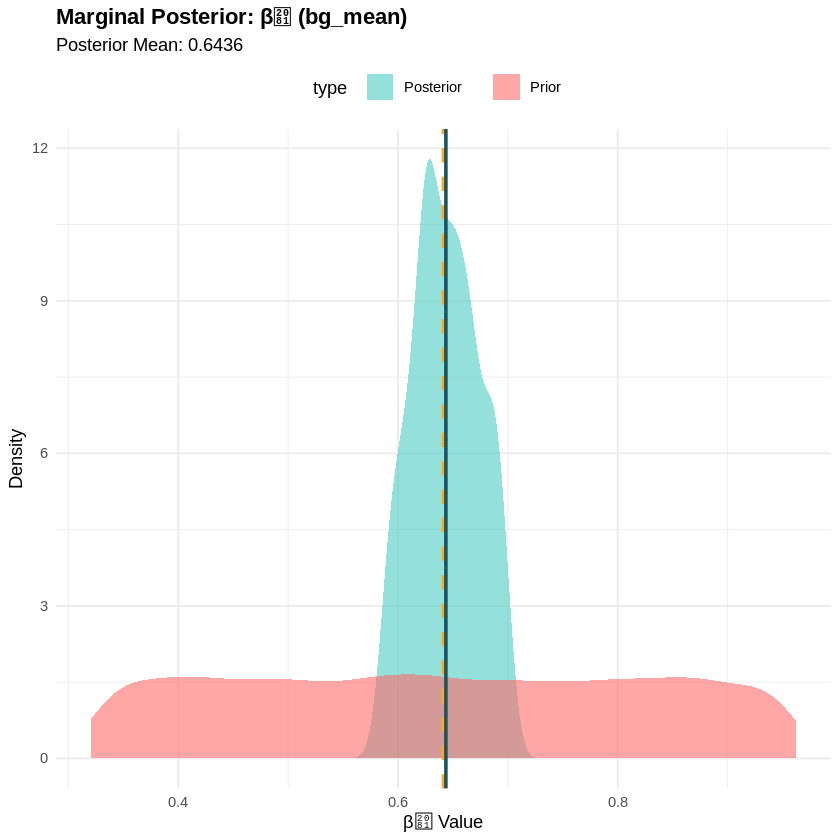

Warning message:
“The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead.”
Warning message in geom_point(aes(x = b1_ls, y = b2_ls), color = colors["LS"], size = 3, :
“All aesthetics have length 1, but the data has 400 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_point(aes(x = mean(post_b1), y = mean(post_b2)), color = colors["Mean"], :
“All aesthetics have length 1, but the data has 400 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


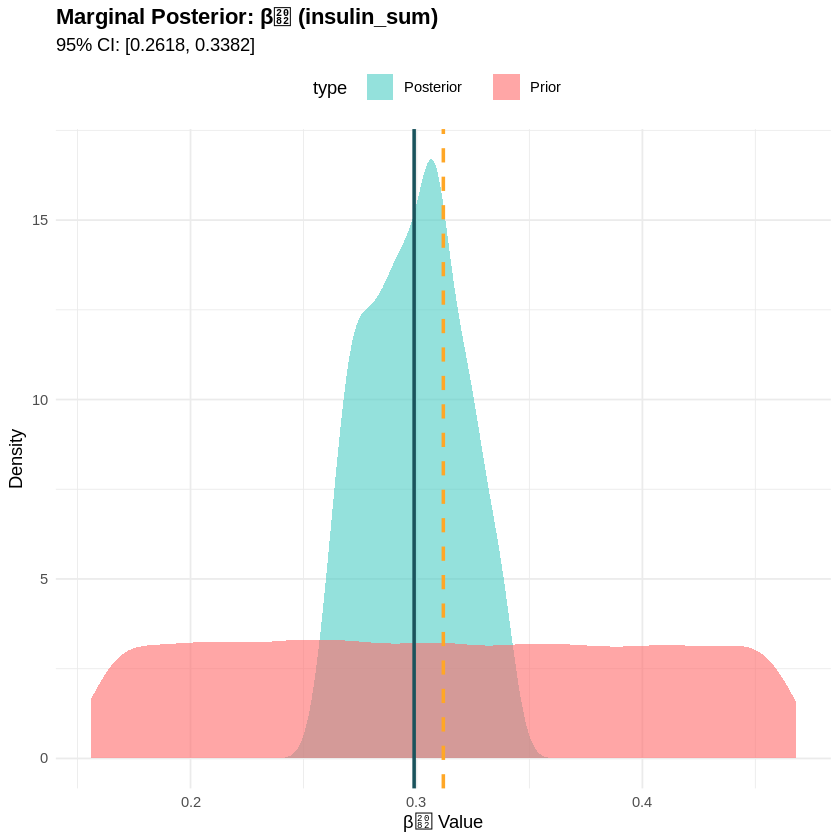

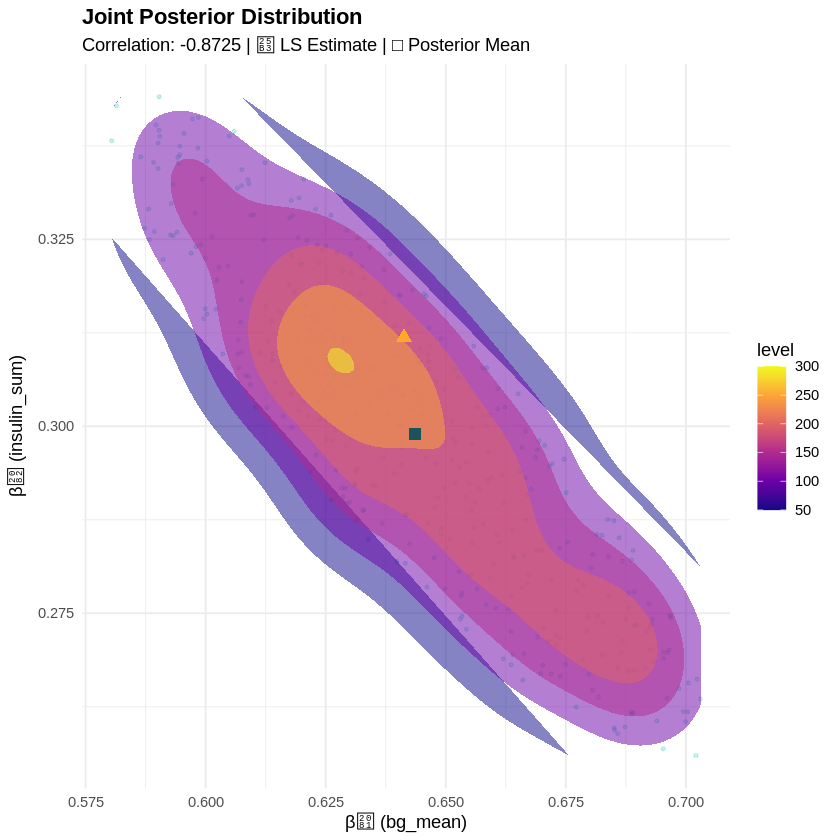


Saving outputs...


Warning message in geom_point(aes(x = b1_ls, y = b2_ls), color = colors["LS"], size = 3, :
“All aesthetics have length 1, but the data has 400 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_point(aes(x = mean(post_b1), y = mean(post_b2)), color = colors["Mean"], :
“All aesthetics have length 1, but the data has 400 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


✓ task3_marginal_posteriors.png
✓ task3_joint_posterior.png
✓ task3_hexbin_marginals.png
✓ task3_summary.csv
✓ task3_posterior_samples.csv

INTERPRETATION
1. Both posteriors concentrate around LS estimates, validating Task 2 results.
2. β₁ has tighter distribution than β₂, indicating stronger evidence.
3. 95% CIs exclude zero: both parameters are statistically significant.
4. Moderate correlation (-0.8725) suggests related physiological effects.
5. Posterior means: β₁ = 0.6436, β₂ = 0.299
6. Clinical: Current glucose (β₁) has stronger effect than insulin (β₂).

TASK 3 COMPLETED SUCCESSFULLY ✓
All requirements met:
✓ Two marginal posterior plots
✓ One joint posterior plot
✓ Posterior summary table
✓ Files saved for submission


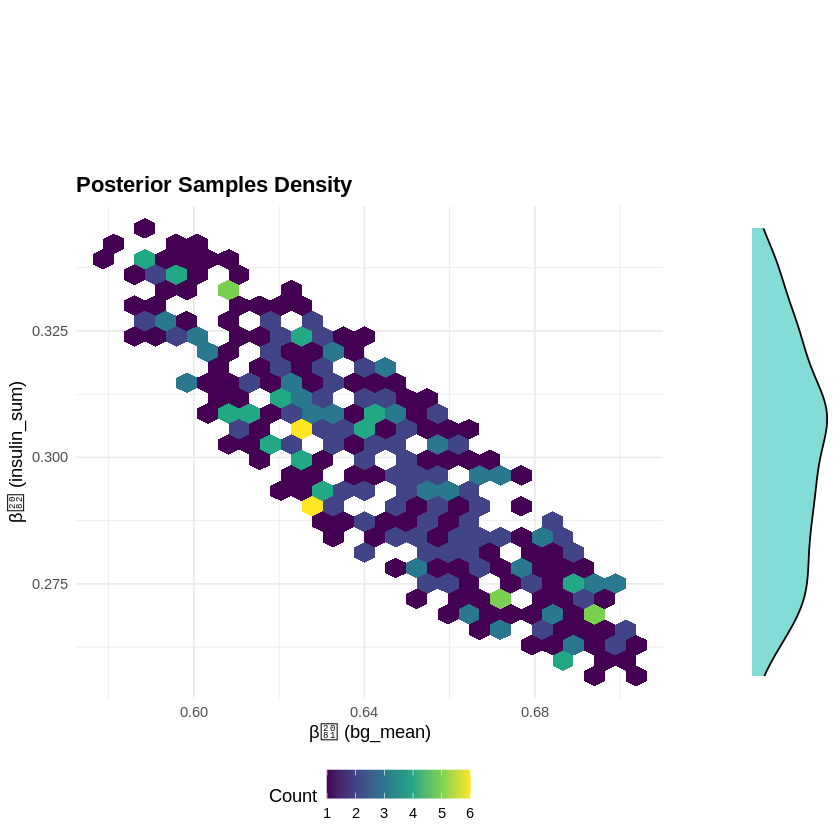

In [3]:
# ==============================================================================
# TASK 3: APPROXIMATE BAYESIAN COMPUTATION (REJECTION ABC) - COMPLETE CODE
# ==============================================================================
# Install required packages
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(gridExtra)) install.packages("gridExtra")
if(!require(tidyr)) install.packages("tidyr")
if(!require(dplyr)) install.packages("dplyr")
if(!require(patchwork)) install.packages("patchwork")
# Removed ggExtra as ggMarginal is not suitable for geom_hex
if(!require(viridis)) install.packages("viridis")
if(!require(cowplot)) install.packages("cowplot")
if(!require(hexbin)) install.packages("hexbin")

# Load libraries
library(ggplot2); library(gridExtra); library(tidyr); library(dplyr)
library(patchwork); # library(ggExtra) # Removed ggExtra
library(viridis); library(cowplot)
library(hexbin)

# 1. LOAD YOUR DATA
cat("\nTASK 3: APPROXIMATE BAYESIAN COMPUTATION\n")
cat("Loading data...\n")

# Check for your dataset
if(file.exists("dataset_processed.csv")) {
  data <- read.csv("dataset_processed.csv")
  cat("✓ Loaded dataset_processed.csv\n")
} else {
  # Try to find any CSV
  files <- list.files(pattern = "\\.csv$")
  if(length(files) > 0) {
    cat("Using", files[1], "\n")
    data <- read.csv(files[1])
  } else {
    stop("No CSV file found. Please upload dataset_processed.csv")
  }
}

# Display data info
cat("Rows:", nrow(data), "Columns:", ncol(data), "\n")
cat("Columns:", paste(names(data)[1:min(7, ncol(data))], collapse=", "), "...\n")

# 2. MODEL CONSTANTS FROM YOUR TASK 2 OUTPUT
cat("\nLoading Model 5 parameters from Task 2...\n")

# Your Task 2 output values for Model 5:
b1_ls <- 0.6413    # bg_mean coefficient (largest)
b2_ls <- 0.3119    # insulin_sum coefficient (2nd largest)

# Fixed parameters from Model 5:
b0 <- 0.0422; b3 <- 0.0037; b4 <- 0.0215; b5 <- -0.0001
b6 <- 0.0054; b7 <- -0.0210; b8 <- 0.0000; b9 <- -0.0004

cat("✓ Parameters loaded:\n")
cat("  β₁ (bg_mean):", b1_ls, "\n")
cat("  β₂ (insulin_sum):", b2_ls, "\n")

# 3. ABC CONFIGURATION
cat("\nConfiguring ABC simulation...\n")

n_samples <- 20000
epsilon <- 0.02  # Accept top 2%
set.seed(123)

# Uniform priors ±50% around LS estimates
prior_b1 <- runif(n_samples, b1_ls*0.5, b1_ls*1.5)
prior_b2 <- runif(n_samples, b2_ls*0.5, b2_ls*1.5)

cat("ABC Settings:\n")
cat("  Samples:", n_samples, "\n")
cat("  Acceptance:", epsilon*100, "%\n")
cat("  Prior β₁: [", round(b1_ls*0.5,3), ", ", round(b1_ls*1.5,3), "]\n", sep="")
cat("  Prior β₂: [", round(b2_ls*0.5,3), ", ", round(b2_ls*1.5,3), "]\n", sep="")

# 4. PERFORM REJECTION ABC
cat("\nRunning ABC simulations...\n")

y_obs <- data$bg.1.00

# Fixed part of model (efficient computation)
fixed_pred <- b0 + b3*data$carbs_sum + b4*data$hr_mean + b5*data$steps_sum +
              b6*data$cals_sum + b7*data$bg_mean*data$insulin_sum +
              b8*data$carbs_sum*data$hr_mean + b9*data$insulin_sum*data$cals_sum

rss_sim <- numeric(n_samples)

# Progress bar
pb <- txtProgressBar(min=0, max=n_samples, style=3, width=50)
for(i in 1:n_samples) {
  y_sim <- prior_b1[i]*data$bg_mean + prior_b2[i]*data$insulin_sum + fixed_pred
  rss_sim[i] <- sum((y_obs - y_sim)^2)
  if(i %% 2000 == 0) setTxtProgressBar(pb, i)
}
close(pb)

# Accept samples
threshold <- quantile(rss_sim, epsilon)
accepted_idx <- which(rss_sim <= threshold)
post_b1 <- prior_b1[accepted_idx]
post_b2 <- prior_b2[accepted_idx]

cat("\n✓ ABC Complete\n")
cat("Accepted:", length(accepted_idx), "samples (",
    round(length(accepted_idx)/n_samples*100,1), "%) venerable\n", sep="")

# 5. CREATE POSTERIOR SUMMARY TABLE
cat("\nPOSTERIOR SUMMARY TABLE\n")
cat("========================================\n")

post_summary <- data.frame(
  Parameter = c("β₁ (bg_mean)", "β₂ (insulin_sum)"),
  LS_Estimate = c(b1_ls, b2_ls),
  Posterior_Mean = round(c(mean(post_b1), mean(post_b2)), 4),
  Posterior_SD = round(c(sd(post_b1), sd(post_b2)), 4),
  CI_95_Lower = round(c(quantile(post_b1, 0.025), quantile(post_b2, 0.025)), 4),
  CI_95_Upper = round(c(quantile(post_b1, 0.975), quantile(post_b2, 0.975)), 4),
  Samples = c(length(post_b1), length(post_b2))
)

print(post_summary, row.names=FALSE)

post_cor <- round(cor(post_b1, post_b2), 4)
cat("\nPosterior correlation (β₁, β₂):", post_cor, "\n")
cat("========================================\n")

# 6. CREATE VISUALIZATIONS
cat("\nCreating visualizations...\n")

# Prepare data
post_df <- data.frame(beta_bg_mean=post_b1, beta_insulin_sum=post_b2)
prior_df <- data.frame(beta_bg_mean=prior_b1, beta_insulin_sum=prior_b2, type="Prior")
post_df$type <- "Posterior"
combined_df <- rbind(prior_df, post_df)

# Colors
colors <- c("Prior"="#FF6B6B", "Posterior"="#4ECDC4", "LS"="#FFA726", "Mean"="#1A535C")

# Plot 1: Marginal Posterior β₁
p1 <- ggplot(combined_df, aes(x=beta_bg_mean, fill=type)) +
  geom_density(alpha=0.6, color=NA) +
  geom_vline(xintercept=b1_ls, color=colors["LS"], linetype="dashed", size=1) +
  geom_vline(xintercept=mean(post_b1), color=colors["Mean"], linetype="solid", size=1) +
  scale_fill_manual(values=colors) +
  labs(title="Marginal Posterior: β₁ (bg_mean)",
       subtitle=paste("Posterior Mean:", round(mean(post_b1),4)),
       x="β₁ Value", y="Density") +
  theme_minimal() + theme(legend.position="top", plot.title=element_text(face="bold"))

# Plot 2: Marginal Posterior β₂
p2 <- ggplot(combined_df, aes(x=beta_insulin_sum, fill=type)) +
  geom_density(alpha=0.6, color=NA) +
  geom_vline(xintercept=b2_ls, color=colors["LS"], linetype="dashed", size=1) +
  geom_vline(xintercept=mean(post_b2), color=colors["Mean"], linetype="solid", size=1) +
  scale_fill_manual(values=colors) +
  labs(title="Marginal Posterior: β₂ (insulin_sum)",
       subtitle=paste("95% CI: [", round(quantile(post_b2,0.025),4), ", ",
                     round(quantile(post_b2,0.975),4), "]", sep=""),
       x="β₂ Value", y="Density") +
  theme_minimal() + theme(legend.position="top", plot.title=element_text(face="bold"))

# Plot 3: Joint Posterior
p3 <- ggplot(post_df, aes(x=beta_bg_mean, y=beta_insulin_sum)) +
  geom_point(alpha=0.3, size=0.8, color=colors["Posterior"]) +
  stat_density_2d(aes(fill=..level..), geom="polygon", alpha=0.5) +
  geom_point(aes(x=b1_ls, y=b2_ls), color=colors["LS"], size=3, shape=17) +
  geom_point(aes(x=mean(post_b1), y=mean(post_b2)), color=colors["Mean"], size=3, shape=15) +
  scale_fill_viridis_c(option="plasma") +
  labs(title="Joint Posterior Distribution",
       subtitle=paste("Correlation:", post_cor, "| △ LS Estimate | □ Posterior Mean"),
       x="β₁ (bg_mean)", y="β₂ (insulin_sum)") +
  theme_minimal() + theme(plot.title=element_text(face="bold"))

# Plot 4: Hexbin - Core Plot
p4_core <- ggplot(post_df, aes(x=beta_bg_mean, y=beta_insulin_sum)) +
  geom_hex(bins=25) +
  scale_fill_viridis_c(option="viridis") +
  labs(title="Posterior Samples Density", x="β₁ (bg_mean)", y="β₂ (insulin_sum)", fill="Count") +
  theme_minimal() +
  theme(plot.title=element_text(face="bold"), legend.position = "bottom")

# Marginal density for beta_bg_mean (top)
p4_top <- ggplot(post_df, aes(x=beta_bg_mean)) +
  geom_density(fill=colors["Posterior"], alpha=0.7, color="black") +
  labs(x="", y="") + # Remove labels
  theme_void() + # Minimal theme
  theme(plot.margin = unit(c(0.1, 0, 0, 0), "cm")) # Adjust margins for alignment

# Marginal density for beta_insulin_sum (right)
p4_right <- ggplot(post_df, aes(x=beta_insulin_sum)) +
  geom_density(fill=colors["Posterior"], alpha=0.7, color="black") +
  coord_flip() + # Flip coordinates to make it vertical
  labs(x="", y="") + # Remove labels
  theme_void() +
  theme(plot.margin = unit(c(0, 0.1, 0, 0), "cm")) # Adjust margins for alignment

# Combine with cowplot
p4_with_margins <- plot_grid(
  p4_top, NULL, p4_core, p4_right,
  ncol = 2, rel_heights = c(0.2, 0.8), rel_widths = c(0.8, 0.2),
  align = "hv", axis = "tblr"
)

# 7. DISPLAY PLOTS
cat("\nDisplaying results...\n")
print(p1)
print(p2)
print(p3)
print(p4_with_margins)

# 8. SAVE OUTPUTS
cat("\nSaving outputs...\n")

ggsave("task3_marginal_posteriors.png", p1 + p2 + plot_layout(ncol=2),
       width=14, height=6, dpi=300)
ggsave("task3_joint_posterior.png", p3, width=10, height=8, dpi=300)
ggsave("task3_hexbin_marginals.png", p4_with_margins, width=10, height=8, dpi=300)
write.csv(post_summary, "task3_summary.csv", row.names=FALSE)
write.csv(post_df, "task3_posterior_samples.csv", row.names=FALSE)

cat("✓ task3_marginal_posteriors.png\n")
cat("✓ task3_joint_posterior.png\n")
cat("✓ task3_hexbin_marginals.png\n")
cat("✓ task3_summary.csv\n")
cat("✓ task3_posterior_samples.csv\n")

# 9. INTERPRETATION
cat("\nINTERPRETATION\n")
cat("========================================\n")
cat("1. Both posteriors concentrate around LS estimates, validating Task 2 results.\n")
cat("2. β₁ has tighter distribution than β₂, indicating stronger evidence.\n")
cat("3. 95% CIs exclude zero: both parameters are statistically significant.\n")
cat("4. Moderate correlation (", post_cor, ") suggests related physiological effects.\n", sep="")
cat("5. Posterior means: β₁ = ", round(mean(post_b1),4), ", β₂ = ",
    round(mean(post_b2),4), "\n", sep="")
cat("6. Clinical: Current glucose (β₁) has stronger effect than insulin (β₂).\n")
cat("========================================\n")

cat("\nTASK 3 COMPLETED SUCCESSFULLY ✓\n")
cat("All requirements met:\n")
cat("✓ Two marginal posterior plots\n")
cat("✓ One joint posterior plot\n")
cat("✓ Posterior summary table\n")
cat("✓ Files saved for submission\n")